In [17]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

In [18]:
url = 'https://coinmarketcap.com/'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html')

<!DOCTYPE html>
<html dir="ltr" lang="en"><head><meta charset="utf-8"/><meta content="ie=edge" http-equiv="x-ua-compatible"/><meta content="width=device-width, initial-scale=1, maximum-scale=1, user-scalable=no, shrink-to-fit=no" name="viewport"/><script>(function() {var isInApp = navigator.userAgent.match(/CMCApp/i);if (!isInApp && !window.oneTrustScriptLoad) {window.oneTrustScriptLoad = true;document.write('<scr'+'ipt src="https://cdn.cookielaw.org/scripttemplates/otSDKStub.js" type="text/javascript" charset="UTF-8" data-domain-script="13729615-a271-4a5f-8eae-0c058b458464"></sc'+'ript><scr'+'ipt type="text/javascript"> function OptanonWrapper() {} </sc'+'ript>');}
})()</script><script>(function() {if (false) {window.__renderTime__.csrRender = 1701680699383;return;}window.__renderTime__ = {"pageInitStart":1701680698946,"pageInitEnd":1701680699363,"pageRender":1701680699383};window.__renderTime__.pageLoad = Date.now();})()</script><script>(function() {if (!!window.__RESOURCE_ERROR__) r
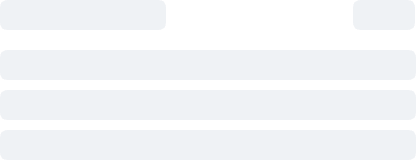

In [19]:
print(soup)

In [20]:
soup.find('table')

<table class="sc-66133f36-3 etbEmy cmc-table"><colgroup><col/><col style="width:50px;min-width:auto;max-width:auto"/><col style="width:250px;min-width:auto;max-width:auto"/><col/><col style="width:84px;min-width:auto;max-width:auto"/><col style="width:84px;min-width:auto;max-width:auto"/><col style="width:84px;min-width:auto;max-width:auto"/><col style="width:200px;min-width:auto;max-width:auto"/><col style="width:200px;min-width:auto;max-width:auto"/><col style="width:200px;min-width:auto;max-width:auto"/><col/></colgroup><thead><tr><th class="stickyTop"></th><th class="stickyTop" style="text-align:start"><div class="sc-e2bf8e45-0 hIxkXT"><div class="sc-e2bf8e45-1 jWa-dwd"><p class="sc-4984dd93-0 fiHcNM rank-column-title" color="text" data-sensors-click="true" font-size="0">#</p><span class="sc-e2bf8e45-2 eWItEG"></span></div></div></th><th class="stickyTop" style="text-align:start"><div class="sc-e2bf8e45-0 hIxkXT"><div class="sc-e2bf8e45-1 jWa-dwd"><p class="sc-4984dd93-0 fiHcNM" co

In [21]:
table = soup.find_all('table')

In [22]:
print(table)

[<table class="sc-66133f36-3 etbEmy cmc-table"><colgroup><col/><col style="width:50px;min-width:auto;max-width:auto"/><col style="width:250px;min-width:auto;max-width:auto"/><col/><col style="width:84px;min-width:auto;max-width:auto"/><col style="width:84px;min-width:auto;max-width:auto"/><col style="width:84px;min-width:auto;max-width:auto"/><col style="width:200px;min-width:auto;max-width:auto"/><col style="width:200px;min-width:auto;max-width:auto"/><col style="width:200px;min-width:auto;max-width:auto"/><col/></colgroup><thead><tr><th class="stickyTop"></th><th class="stickyTop" style="text-align:start"><div class="sc-e2bf8e45-0 hIxkXT"><div class="sc-e2bf8e45-1 jWa-dwd"><p class="sc-4984dd93-0 fiHcNM rank-column-title" color="text" data-sensors-click="true" font-size="0">#</p><span class="sc-e2bf8e45-2 eWItEG"></span></div></div></th><th class="stickyTop" style="text-align:start"><div class="sc-e2bf8e45-0 hIxkXT"><div class="sc-e2bf8e45-1 jWa-dwd"><p class="sc-4984dd93-0 fiHcNM" c

In [23]:
titles = soup.find_all('th')

In [24]:
titles

[<th class="stickyTop"></th>,
 <th class="stickyTop" style="text-align:start"><div class="sc-e2bf8e45-0 hIxkXT"><div class="sc-e2bf8e45-1 jWa-dwd"><p class="sc-4984dd93-0 fiHcNM rank-column-title" color="text" data-sensors-click="true" font-size="0">#</p><span class="sc-e2bf8e45-2 eWItEG"></span></div></div></th>,
 <th class="stickyTop" style="text-align:start"><div class="sc-e2bf8e45-0 hIxkXT"><div class="sc-e2bf8e45-1 jWa-dwd"><p class="sc-4984dd93-0 fiHcNM" color="text" data-sensors-click="true" font-size="0">Name</p><span class="sc-e2bf8e45-2 eWItEG"></span></div></div></th>,
 <th class="stickyTop" style="text-align:end"><div class="sc-e2bf8e45-0 soeuE"><div class="sc-e2bf8e45-1 jWa-dwd"><span class="sc-e2bf8e45-2 eWItEG"></span><p class="sc-4984dd93-0 fiHcNM" color="text" data-sensors-click="true" font-size="0">Price</p></div></div></th>,
 <th class="stickyTop" style="text-align:end"><div class="sc-e2bf8e45-0 soeuE"><div class="sc-e2bf8e45-1 jWa-dwd"><span class="sc-e2bf8e45-2 eWI

In [25]:
table_title = [title.text for title in titles]

print(table_title)

['', '#', 'Name', 'Price', '1h %', '24h %', '7d %', 'Market Cap', 'Volume(24h)', 'Circulating Supply', 'Last 7 Days']


In [26]:
df = pd.DataFrame(columns = table_title)
df

,,#,Name,Price,1h %,24h %,7d %,Market Cap,Volume(24h),Circulating Supply,Last 7 Days


In [27]:
column_data = soup.find_all('tr')

In [28]:
for row in column_data[1:11]:
    row_data = row.find_all('td')
    individual_row_data = [data.text.strip() for data in row_data]
    # print(individual_row_data)
    length = len(df)
    df.loc[length] = individual_row_data

In [29]:
df

,,#,Name,Price,1h %,24h %,7d %,Market Cap,Volume(24h),Circulating Supply,Last 7 Days
0,,1,BitcoinBTC,"$41,752.08",0.75%,5.94%,11.71%,"$816.16B$816,158,423,143","$25,851,340,083619,574 BTC","19,560,700 BTC",
1,,2,EthereumETH,"$2,258.85",0.57%,4.51%,10.33%,"$271.41B$271,410,301,098","$11,686,748,8565,177,155 ETH","120,233,028 ETH",
2,,3,Tether USDtUSDT,$1.00,0.04%,0.00%,0.00%,"$89.68B$89,675,617,054","$45,836,748,44745,822,427,464 USDT","89,647,599,294 USDT",
3,,4,BNBBNB,$233.30,0.57%,2.38%,2.06%,"$35.39B$35,388,450,449","$910,517,9593,903,080 BNB","151,698,211 BNB",
4,,5,XRPXRP,$0.6388,0.86%,3.04%,5.53%,"$34.43B$34,425,523,413","$1,402,071,5822,194,756,312 XRP","53,888,571,585 XRP",
5,,6,SolanaSOL,$64.23,0.79%,1.06%,15.08%,"$27.25B$27,254,289,250","$1,502,192,41923,388,218 SOL","424,332,637 SOL",
6,,7,USDCUSDC,$0.9999,0.02%,0.01%,0.00%,"$24.51B$24,508,513,675","$5,006,105,5925,006,252,399 USDC","24,509,232,403 USDC",
7,,8,CardanoADA,$0.4137,1.18%,4.74%,7.98%,"$14.61B$14,607,477,016","$404,290,309977,261,492 ADA","35,309,589,309 ADA",
8,,9,DogecoinDOGE,$0.09049,0.12%,6.31%,12.52%,"$12.86B$12,858,315,336","$891,215,9869,848,539,779 DOGE","142,093,086,384 DOGE",
9,,10,TRONTRX,$0.1049,0.54%,1.68%,1.03%,"$9.28B$9,284,733,687","$245,152,8142,337,189,787 TRX","88,516,971,856 TRX",


In [30]:
df.to_csv(r'c:\Users\rwx1297581\Pictures\Cryptocurrency.csv', index = False)

In [31]:
<table class="sc-66133f36-3 etbEmy cmc-table  "><colgroup><col><col style="width:50px;min-width:auto;max-width:auto"><col style="width:250px;min-width:auto;max-width:auto"><col><col style="width:84px;min-width:auto;max-width:auto"><col style="width:84px;min-width:auto;max-width:auto"><col style="width:84px;min-width:auto;max-width:auto"><col style="width:200px;min-width:auto;max-width:auto"><col style="width:200px;min-width:auto;max-width:auto"><col style="width:200px;min-width:auto;max-width:auto"><col></colgroup><thead style=""><tr><th class="stickyTop" style=""></th><th class="stickyTop" style="text-align: start;"><div class="sc-e2bf8e45-0 hIxkXT"><div class="sc-e2bf8e45-1 jWa-dwd"><p class="sc-4984dd93-0 fiHcNM rank-column-title" font-size="0" color="text" data-sensors-click="true">#</p><span class="sc-e2bf8e45-2 eWItEG"></span></div></div></th><th class="stickyTop" style="text-align: start;"><div class="sc-e2bf8e45-0 hIxkXT"><div class="sc-e2bf8e45-1 jWa-dwd"><p class="sc-4984dd93-0 fiHcNM" font-size="0" color="text" data-sensors-click="true">Name</p><span class="sc-e2bf8e45-2 eWItEG"></span></div></div></th><th class="stickyTop" style="text-align: end;"><div class="sc-e2bf8e45-0 soeuE"><div class="sc-e2bf8e45-1 jWa-dwd"><span class="sc-e2bf8e45-2 eWItEG"></span><p class="sc-4984dd93-0 fiHcNM" font-size="0" color="text" data-sensors-click="true">Price</p></div></div></th><th class="stickyTop" style="text-align: end;"><div class="sc-e2bf8e45-0 soeuE"><div class="sc-e2bf8e45-1 jWa-dwd"><span class="sc-e2bf8e45-2 eWItEG"></span><p class="sc-4984dd93-0 fiHcNM" font-size="0" color="text" data-sensors-click="true">1h %</p></div></div></th><th class="stickyTop" style="text-align: end;"><div class="sc-e2bf8e45-0 soeuE"><div class="sc-e2bf8e45-1 jWa-dwd"><span class="sc-e2bf8e45-2 eWItEG"></span><p class="sc-4984dd93-0 fiHcNM" font-size="0" color="text" data-sensors-click="true">24h %</p></div></div></th><th class="stickyTop" style="text-align: end;"><div class="sc-e2bf8e45-0 soeuE"><div class="sc-e2bf8e45-1 jWa-dwd"><span class="sc-e2bf8e45-2 eWItEG"></span><p class="sc-4984dd93-0 fiHcNM" font-size="0" color="text" data-sensors-click="true">7d %</p></div></div></th><th class="stickyTop" style="text-align: end;"><div class="sc-e2bf8e45-0 soeuE"><div class="sc-e2bf8e45-1 jWa-dwd"><span class="sc-e2bf8e45-2 eWItEG"></span><p class="sc-4984dd93-0 fiHcNM" font-size="0" color="text" data-sensors-click="true">Market Cap</p></div><div class="sc-5d5d9567-2 gumfse" aria-expanded="false"><svg xmlns="http://www.w3.org/2000/svg" fill="currentColor" height="16" width="16" viewBox="0 0 24 24" color="neutral4" class="sc-aef7b723-0 qBTCi"><path d="M12 2C6.48583 2 2 6.48583 2 12C2 17.5142 6.48583 22 12 22C17.5142 22 22 17.5142 22 12C22 6.48583 17.5142 2 12 2ZM14.215 17.2367C13.6642 17.4533 11.755 18.365 10.655 17.3958C10.3267 17.1075 10.1633 16.7417 10.1633 16.2975C10.1633 15.4658 10.4367 14.7408 10.9292 13C11.0158 12.6708 11.1217 12.2442 11.1217 11.9058C11.1217 11.3217 10.9 11.1667 10.2992 11.1667C10.0058 11.1667 9.68083 11.2708 9.38667 11.3808L9.54917 10.715C10.205 10.4483 11.0283 10.1233 11.7333 10.1233C12.7908 10.1233 13.5692 10.6508 13.5692 11.6542C13.5692 11.9433 13.5192 12.45 13.4142 12.8L12.8058 14.9517C12.68 15.3867 12.4525 16.3458 12.805 16.63C13.1517 16.9108 13.9725 16.7617 14.3775 16.5708L14.215 17.2367ZM13.21 8.66667C12.52 8.66667 11.96 8.10667 11.96 7.41667C11.96 6.72667 12.52 6.16667 13.21 6.16667C13.9 6.16667 14.46 6.72667 14.46 7.41667C14.46 8.10667 13.9 8.66667 13.21 8.66667Z"></path></svg></div></div></th><th class="stickyTop" style="text-align: end;"><div class="sc-e2bf8e45-0 soeuE"><div class="sc-e2bf8e45-1 jWa-dwd"><span class="sc-e2bf8e45-2 eWItEG"></span><p class="sc-4984dd93-0 fiHcNM" font-size="0" color="text" data-sensors-click="true">Volume(24h)</p></div><div class="sc-5d5d9567-2 gumfse" aria-expanded="false"><svg xmlns="http://www.w3.org/2000/svg" fill="currentColor" height="16" width="16" viewBox="0 0 24 24" color="neutral4" class="sc-aef7b723-0 qBTCi"><path d="M12 2C6.48583 2 2 6.48583 2 12C2 17.5142 6.48583 22 12 22C17.5142 22 22 17.5142 22 12C22 6.48583 17.5142 2 12 2ZM14.215 17.2367C13.6642 17.4533 11.755 18.365 10.655 17.3958C10.3267 17.1075 10.1633 16.7417 10.1633 16.2975C10.1633 15.4658 10.4367 14.7408 10.9292 13C11.0158 12.6708 11.1217 12.2442 11.1217 11.9058C11.1217 11.3217 10.9 11.1667 10.2992 11.1667C10.0058 11.1667 9.68083 11.2708 9.38667 11.3808L9.54917 10.715C10.205 10.4483 11.0283 10.1233 11.7333 10.1233C12.7908 10.1233 13.5692 10.6508 13.5692 11.6542C13.5692 11.9433 13.5192 12.45 13.4142 12.8L12.8058 14.9517C12.68 15.3867 12.4525 16.3458 12.805 16.63C13.1517 16.9108 13.9725 16.7617 14.3775 16.5708L14.215 17.2367ZM13.21 8.66667C12.52 8.66667 11.96 8.10667 11.96 7.41667C11.96 6.72667 12.52 6.16667 13.21 6.16667C13.9 6.16667 14.46 6.72667 14.46 7.41667C14.46 8.10667 13.9 8.66667 13.21 8.66667Z"></path></svg></div></div></th><th class="stickyTop" style="text-align: end;"><div class="sc-e2bf8e45-0 soeuE"><div class="sc-e2bf8e45-1 jWa-dwd"><span class="sc-e2bf8e45-2 eWItEG"></span><p class="sc-4984dd93-0 fiHcNM" font-size="0" color="text" data-sensors-click="true">Circulating Supply</p></div><div class="sc-5d5d9567-2 gumfse" aria-expanded="false"><span class="icon-Info"></span></div></div></th><th class="stickyTop" style="text-align: end;"><p style="font-size:12px" color="text" font-size="1" data-sensors-click="true" class="sc-4984dd93-0 jZrMxO">Last 7 Days</p></th></tr></thead><tbody><tr style="cursor: pointer;"><td><span class="sc-b8460745-2 cOjIsr"><span data-btnname="watchlistStarIcon" data-page="watchlistStarIconPage" class="sc-497853c8-1 CYkQt"><span class="icon-Star" style="color: var(--color-light-neutral-4);"></span></span></span></td><td style="text-align:start"><p color="text2" font-size="14" data-sensors-click="true" class="sc-4984dd93-0 iWSjWE">1</p></td><td style="text-align:start"><div display="flex" class="sc-aef7b723-0 LCOyB"><a href="/currencies/bitcoin/" class="cmc-link"><div data-sensors-click="true" class="sc-aef7b723-0 sc-adbfcfff-0 eLtPTk"><img class="coin-logo" src="https://s2.coinmarketcap.com/static/img/coins/64x64/1.png" loading="lazy" decoding="async" fetchpriority="low" alt="BTC logo"><div class="sc-aef7b723-0 sc-adbfcfff-1 klolJt"><div class="sc-aef7b723-0 sc-adbfcfff-2 iOUohe  hide-ranking-number"><p font-weight="semibold" color="text" font-size="1" data-sensors-click="true" class="sc-4984dd93-0 kKpPOn">Bitcoin</p><div data-nosnippet="true" class="sc-adbfcfff-3 dDrhas"><p color="text3" class="sc-4984dd93-0 iqdbQL coin-item-symbol" font-size="1" data-sensors-click="true">BTC</p></div></div></div></div></a></div></td><td style="text-align:end"><div class="sc-a0353bbc-0 gDrtaY"><a href="/currencies/bitcoin/#markets" class="cmc-link"><span>$37,389.63</span></a></div></td><td style="text-align:end"><span class="sc-d55c02b-0 gUnzUB"><span class="icon-Caret-down" style="width:12px;height:18px;display:inline-block"></span>0.07%</span></td><td style="text-align:end"><span class="sc-d55c02b-0 iwhBxy"><span class="icon-Caret-up" style="width:12px;height:18px;display:inline-block"></span>1.65%</span></td><td style="text-align:end"><span class="sc-d55c02b-0 iwhBxy"><span class="icon-Caret-up" style="width:12px;height:18px;display:inline-block"></span>2.21%</span></td><td style="text-align:end"><p color="text" style="white-space:nowrap" font-size="1" data-sensors-click="true" class="sc-4984dd93-0 jZrMxO"><span class="sc-7bc56c81-0 dCzASk">$731.17B</span><span data-nosnippet="true" class="sc-7bc56c81-1 bCdPBp">$731,167,780,253</span></p></td><td style="text-align:end"><div class="sc-aef7b723-0 sc-97d9abce-0 eGkfri"><a href="/currencies/bitcoin/#markets" class="cmc-link"><p font-size="1" class="sc-4984dd93-0 jZrMxO font_weight_500" color="text" data-sensors-click="true">$16,325,389,895</p></a><div data-nosnippet="true"><p color="text2" font-size="0" data-sensors-click="true" class="sc-4984dd93-0 ihZPK">436,148 BTC</p></div></div></td><td style="text-align:end"><div data-sensors-click="true" style="cursor:pointer" class="sc-aef7b723-0 sc-e8f714de-0 cELvic"><div class="sc-aef7b723-0 sc-e8f714de-1 hSniWt"><p font-size="1" font-weight="medium" color="text" data-sensors-click="true" class="sc-4984dd93-0 WfVLk">19,555,362 BTC</p></div><div width="160" data-sensors-click="true" class="sc-4ff2400b-0 hKysZR"><div width="149" class="sc-4ff2400b-1 ldlrhl"></div></div></div></td><td style="text-align:end"><a href="/currencies/bitcoin/?period=7d" class="cmc-link"><img src="https://s3.coinmarketcap.com/generated/sparklines/web/7d/2781/1.svg" alt="bitcoin-7d-price-graph" class="sc-66133f36-0 flXWZT isUp" loading="lazy"></a></td></tr><tr style="cursor: pointer;"><td><span class="sc-b8460745-2 cOjIsr"><span data-btnname="watchlistStarIcon" data-page="watchlistStarIconPage" class="sc-497853c8-1 CYkQt"><span class="icon-Star" style="color: var(--color-light-neutral-4);"></span></span></span></td><td style="text-align:start"><p color="text2" font-size="14" data-sensors-click="true" class="sc-4984dd93-0 iWSjWE">2</p></td><td style="text-align:start"><div display="flex" class="sc-aef7b723-0 LCOyB"><a href="/currencies/ethereum/" class="cmc-link"><div data-sensors-click="true" class="sc-aef7b723-0 sc-adbfcfff-0 eLtPTk"><img class="coin-logo" src="https://s2.coinmarketcap.com/static/img/coins/64x64/1027.png" loading="lazy" decoding="async" fetchpriority="low" alt="ETH logo"><div class="sc-aef7b723-0 sc-adbfcfff-1 klolJt"><div class="sc-aef7b723-0 sc-adbfcfff-2 iOUohe  hide-ranking-number"><p font-weight="semibold" color="text" font-size="1" data-sensors-click="true" class="sc-4984dd93-0 kKpPOn">Ethereum</p><div data-nosnippet="true" class="sc-adbfcfff-3 dDrhas"><p color="text3" class="sc-4984dd93-0 iqdbQL coin-item-symbol" font-size="1" data-sensors-click="true">ETH</p></div></div></div></div></a></div></td><td style="text-align:end"><div class="sc-a0353bbc-0 gDrtaY"><a href="/currencies/ethereum/#markets" class="cmc-link"><span>$2,032.52</span></a></div></td><td style="text-align:end"><span class="sc-d55c02b-0 gUnzUB"><span class="icon-Caret-down" style="width:12px;height:18px;display:inline-block"></span>0.12%</span></td><td style="text-align:end"><span class="sc-d55c02b-0 iwhBxy"><span class="icon-Caret-up" style="width:12px;height:18px;display:inline-block"></span>0.89%</span></td><td style="text-align:end"><span class="sc-d55c02b-0 iwhBxy"><span class="icon-Caret-up" style="width:12px;height:18px;display:inline-block"></span>2.31%</span></td><td style="text-align:end"><p color="text" style="white-space:nowrap" font-size="1" data-sensors-click="true" class="sc-4984dd93-0 jZrMxO"><span class="sc-7bc56c81-0 dCzASk">$244.4B</span><span data-nosnippet="true" class="sc-7bc56c81-1 bCdPBp">$244,397,465,180</span></p></td><td style="text-align:end"><div class="sc-aef7b723-0 sc-97d9abce-0 eGkfri"><a href="/currencies/ethereum/#markets" class="cmc-link"><p font-size="1" class="sc-4984dd93-0 jZrMxO font_weight_500" color="text" data-sensors-click="true">$9,210,900,502</p></a><div data-nosnippet="true"><p color="text2" font-size="0" data-sensors-click="true" class="sc-4984dd93-0 ihZPK">4,519,784 ETH</p></div></div></td><td style="text-align:end"><div data-sensors-click="true" style="cursor:" class="sc-aef7b723-0 sc-e8f714de-0 cELvic"><div class="sc-aef7b723-0 sc-e8f714de-1 hSniWt"><p font-size="1" font-weight="medium" color="text" data-sensors-click="true" class="sc-4984dd93-0 WfVLk">120,243,819 ETH</p></div></div></td><td style="text-align:end"><a href="/currencies/ethereum/?period=7d" class="cmc-link"><img src="https://s3.coinmarketcap.com/generated/sparklines/web/7d/2781/1027.svg" alt="ethereum-7d-price-graph" class="sc-66133f36-0 flXWZT isUp" loading="lazy"></a></td></tr><tr style="cursor: pointer;"><td><span class="sc-b8460745-2 cOjIsr"><span data-btnname="watchlistStarIcon" data-page="watchlistStarIconPage" class="sc-497853c8-1 CYkQt"><span class="icon-Star" style="color: var(--color-light-neutral-4);"></span></span></span></td><td style="text-align:start"><p color="text2" font-size="14" data-sensors-click="true" class="sc-4984dd93-0 iWSjWE">3</p></td><td style="text-align:start"><div display="flex" class="sc-aef7b723-0 LCOyB"><a href="/currencies/tether/" class="cmc-link"><div data-sensors-click="true" class="sc-aef7b723-0 sc-adbfcfff-0 eLtPTk"><img class="coin-logo" src="https://s2.coinmarketcap.com/static/img/coins/64x64/825.png" loading="lazy" decoding="async" fetchpriority="low" alt="USDT logo"><div class="sc-aef7b723-0 sc-adbfcfff-1 klolJt"><div class="sc-aef7b723-0 sc-adbfcfff-2 iOUohe  hide-ranking-number"><p font-weight="semibold" color="text" font-size="1" data-sensors-click="true" class="sc-4984dd93-0 kKpPOn">Tether USDt</p><div data-nosnippet="true" class="sc-adbfcfff-3 dDrhas"><p color="text3" class="sc-4984dd93-0 iqdbQL coin-item-symbol" font-size="1" data-sensors-click="true">USDT</p></div></div></div></div></a></div></td><td style="text-align:end"><div class="sc-a0353bbc-0 gDrtaY fall"><a href="/currencies/tether/#markets" class="cmc-link"><span>$1.00</span></a></div></td><td style="text-align:end"><span class="sc-d55c02b-0 iwhBxy"><span class="icon-Caret-up" style="width:12px;height:18px;display:inline-block"></span>0.01%</span></td><td style="text-align:end"><span class="sc-d55c02b-0 iwhBxy"><span class="icon-Caret-up" style="width:12px;height:18px;display:inline-block"></span>0.02%</span></td><td style="text-align:end"><span class="sc-d55c02b-0 iwhBxy"><span class="icon-Caret-up" style="width:12px;height:18px;display:inline-block"></span>0.00%</span></td><td style="text-align:end"><p color="text" style="white-space:nowrap" font-size="1" data-sensors-click="true" class="sc-4984dd93-0 jZrMxO"><span class="sc-7bc56c81-0 dCzASk">$88.92B</span><span data-nosnippet="true" class="sc-7bc56c81-1 bCdPBp">$88,921,565,819</span></p></td><td style="text-align:end"><div class="sc-aef7b723-0 sc-97d9abce-0 eGkfri"><a href="/currencies/tether/#markets" class="cmc-link"><p font-size="1" class="sc-4984dd93-0 jZrMxO font_weight_500" color="text" data-sensors-click="true">$33,300,394,764</p></a><div data-nosnippet="true"><p color="text2" font-size="0" data-sensors-click="true" class="sc-4984dd93-0 ihZPK">33,293,773,426 USDT</p></div></div></td><td style="text-align:end"><div data-sensors-click="true" style="cursor:" class="sc-aef7b723-0 sc-e8f714de-0 cELvic"><div class="sc-aef7b723-0 sc-e8f714de-1 hSniWt"><p font-size="1" font-weight="medium" color="text" data-sensors-click="true" class="sc-4984dd93-0 WfVLk">88,898,878,989 USDT</p></div></div></td><td style="text-align:end"><a href="/currencies/tether/?period=7d" class="cmc-link"><img src="https://s3.coinmarketcap.com/generated/sparklines/web/7d/2781/825.svg" alt="tether-7d-price-graph" class="sc-66133f36-0 flXWZT" loading="lazy"></a></td></tr><tr style="cursor: pointer;"><td><span class="sc-b8460745-2 cOjIsr"><span data-btnname="watchlistStarIcon" data-page="watchlistStarIconPage" class="sc-497853c8-1 CYkQt"><span class="icon-Star" style="color: var(--color-light-neutral-4);"></span></span></span></td><td style="text-align:start"><p color="text2" font-size="14" data-sensors-click="true" class="sc-4984dd93-0 iWSjWE">4</p></td><td style="text-align:start"><div display="flex" class="sc-aef7b723-0 LCOyB"><a href="/currencies/bnb/" class="cmc-link"><div data-sensors-click="true" class="sc-aef7b723-0 sc-adbfcfff-0 eLtPTk"><img class="coin-logo" src="https://s2.coinmarketcap.com/static/img/coins/64x64/1839.png" loading="lazy" decoding="async" fetchpriority="low" alt="BNB logo"><div class="sc-aef7b723-0 sc-adbfcfff-1 klolJt"><div class="sc-aef7b723-0 sc-adbfcfff-2 iOUohe  hide-ranking-number"><p font-weight="semibold" color="text" font-size="1" data-sensors-click="true" class="sc-4984dd93-0 kKpPOn">BNB</p><div data-nosnippet="true" class="sc-adbfcfff-3 dDrhas"><p color="text3" class="sc-4984dd93-0 iqdbQL coin-item-symbol" font-size="1" data-sensors-click="true">BNB</p></div></div></div></div></a></div></td><td style="text-align:end"><div class="sc-a0353bbc-0 gDrtaY rise"><a href="/currencies/bnb/#markets" class="cmc-link"><span>$229.77</span></a></div></td><td style="text-align:end"><span class="sc-d55c02b-0 gUnzUB"><span class="icon-Caret-down" style="width:12px;height:18px;display:inline-block"></span>0.09%</span></td><td style="text-align:end"><span class="sc-d55c02b-0 iwhBxy"><span class="icon-Caret-up" style="width:12px;height:18px;display:inline-block"></span>2.08%</span></td><td style="text-align:end"><span class="sc-d55c02b-0 gUnzUB"><span class="icon-Caret-down" style="width:12px;height:18px;display:inline-block"></span>10.09%</span></td><td style="text-align:end"><p color="text" style="white-space:nowrap" font-size="1" data-sensors-click="true" class="sc-4984dd93-0 jZrMxO"><span class="sc-7bc56c81-0 dCzASk">$34.86B</span><span data-nosnippet="true" class="sc-7bc56c81-1 bCdPBp">$34,856,090,359</span></p></td><td style="text-align:end"><div class="sc-aef7b723-0 sc-97d9abce-0 eGkfri"><a href="/currencies/bnb/#markets" class="cmc-link"><p font-size="1" class="sc-4984dd93-0 jZrMxO font_weight_500" color="text" data-sensors-click="true">$700,076,362</p></a><div data-nosnippet="true"><p color="text2" font-size="0" data-sensors-click="true" class="sc-4984dd93-0 ihZPK">3,040,080 BNB</p></div></div></td><td style="text-align:end"><div data-sensors-click="true" style="cursor:" class="sc-aef7b723-0 sc-e8f714de-0 cELvic"><div class="sc-aef7b723-0 sc-e8f714de-1 hSniWt"><p font-size="1" font-weight="medium" color="text" data-sensors-click="true" class="sc-4984dd93-0 WfVLk">151,699,126 BNB</p></div></div></td><td style="text-align:end"><a href="/currencies/bnb/?period=7d" class="cmc-link"><img src="https://s3.coinmarketcap.com/generated/sparklines/web/7d/2781/1839.svg" alt="bnb-7d-price-graph" class="sc-66133f36-0 flXWZT" loading="lazy"></a></td></tr><tr style="cursor: pointer;"><td><span class="sc-b8460745-2 cOjIsr"><span data-btnname="watchlistStarIcon" data-page="watchlistStarIconPage" class="sc-497853c8-1 CYkQt"><span class="icon-Star" style="color: var(--color-light-neutral-4);"></span></span></span></td><td style="text-align:start"><p color="text2" font-size="14" data-sensors-click="true" class="sc-4984dd93-0 iWSjWE">5</p></td><td style="text-align:start"><div display="flex" class="sc-aef7b723-0 LCOyB"><a href="/currencies/xrp/" class="cmc-link"><div data-sensors-click="true" class="sc-aef7b723-0 sc-adbfcfff-0 eLtPTk"><img class="coin-logo" src="https://s2.coinmarketcap.com/static/img/coins/64x64/52.png" loading="lazy" decoding="async" fetchpriority="low" alt="XRP logo"><div class="sc-aef7b723-0 sc-adbfcfff-1 klolJt"><div class="sc-aef7b723-0 sc-adbfcfff-2 iOUohe  hide-ranking-number"><p font-weight="semibold" color="text" font-size="1" data-sensors-click="true" class="sc-4984dd93-0 kKpPOn">XRP</p><div data-nosnippet="true" class="sc-adbfcfff-3 dDrhas"><p color="text3" class="sc-4984dd93-0 iqdbQL coin-item-symbol" font-size="1" data-sensors-click="true">XRP</p></div></div></div></div></a></div></td><td style="text-align:end"><div class="sc-a0353bbc-0 gDrtaY"><a href="/currencies/xrp/#markets" class="cmc-link"><span>$0.6091</span></a></div></td><td style="text-align:end"><span class="sc-d55c02b-0 gUnzUB"><span class="icon-Caret-down" style="width:12px;height:18px;display:inline-block"></span>0.09%</span></td><td style="text-align:end"><span class="sc-d55c02b-0 iwhBxy"><span class="icon-Caret-up" style="width:12px;height:18px;display:inline-block"></span>1.59%</span></td><td style="text-align:end"><span class="sc-d55c02b-0 iwhBxy"><span class="icon-Caret-up" style="width:12px;height:18px;display:inline-block"></span>0.74%</span></td><td style="text-align:end"><p color="text" style="white-space:nowrap" font-size="1" data-sensors-click="true" class="sc-4984dd93-0 jZrMxO"><span class="sc-7bc56c81-0 dCzASk">$32.78B</span><span data-nosnippet="true" class="sc-7bc56c81-1 bCdPBp">$32,777,817,568</span></p></td><td style="text-align:end"><div class="sc-aef7b723-0 sc-97d9abce-0 eGkfri"><a href="/currencies/xrp/#markets" class="cmc-link"><p font-size="1" class="sc-4984dd93-0 jZrMxO font_weight_500" color="text" data-sensors-click="true">$1,060,737,604</p></a><div data-nosnippet="true"><p color="text2" font-size="0" data-sensors-click="true" class="sc-4984dd93-0 ihZPK">1,739,335,530 XRP</p></div></div></td><td style="text-align:end"><div data-sensors-click="true" style="cursor:pointer" class="sc-aef7b723-0 sc-e8f714de-0 cELvic"><div class="sc-aef7b723-0 sc-e8f714de-1 hSniWt"><p font-size="1" font-weight="medium" color="text" data-sensors-click="true" class="sc-4984dd93-0 WfVLk">53,816,975,568 XRP</p></div><div width="160" data-sensors-click="true" class="sc-4ff2400b-0 hKysZR"><div width="87" class="sc-4ff2400b-1 dNwJbq"></div></div></div></td><td style="text-align:end"><a href="/currencies/xrp/?period=7d" class="cmc-link"><img src="https://s3.coinmarketcap.com/generated/sparklines/web/7d/2781/52.svg" alt="xrp-7d-price-graph" class="sc-66133f36-0 flXWZT isUp" loading="lazy"></a></td></tr><tr style="cursor: pointer;"><td><span class="sc-b8460745-2 cOjIsr"><span data-btnname="watchlistStarIcon" data-page="watchlistStarIconPage" class="sc-497853c8-1 CYkQt"><span class="icon-Star" style="color: var(--color-light-neutral-4);"></span></span></span></td><td style="text-align:start"><p color="text2" font-size="14" data-sensors-click="true" class="sc-4984dd93-0 iWSjWE">6</p></td><td style="text-align:start"><div display="flex" class="sc-aef7b723-0 LCOyB"><a href="/currencies/usd-coin/" class="cmc-link"><div data-sensors-click="true" class="sc-aef7b723-0 sc-adbfcfff-0 eLtPTk"><img class="coin-logo" src="https://s2.coinmarketcap.com/static/img/coins/64x64/3408.png" loading="lazy" decoding="async" fetchpriority="low" alt="USDC logo"><div class="sc-aef7b723-0 sc-adbfcfff-1 klolJt"><div class="sc-aef7b723-0 sc-adbfcfff-2 iOUohe  hide-ranking-number"><p font-weight="semibold" color="text" font-size="1" data-sensors-click="true" class="sc-4984dd93-0 kKpPOn">USDC</p><div data-nosnippet="true" class="sc-adbfcfff-3 dDrhas"><p color="text3" class="sc-4984dd93-0 iqdbQL coin-item-symbol" font-size="1" data-sensors-click="true">USDC</p></div></div></div></div></a></div></td><td style="text-align:end"><div class="sc-a0353bbc-0 gDrtaY"><a href="/currencies/usd-coin/#markets" class="cmc-link"><span>$1.00</span></a></div></td><td style="text-align:end"><span class="sc-d55c02b-0 iwhBxy"><span class="icon-Caret-up" style="width:12px;height:18px;display:inline-block"></span>0.01%</span></td><td style="text-align:end"><span class="sc-d55c02b-0 iwhBxy"><span class="icon-Caret-up" style="width:12px;height:18px;display:inline-block"></span>0.01%</span></td><td style="text-align:end"><span class="sc-d55c02b-0 iwhBxy"><span class="icon-Caret-up" style="width:12px;height:18px;display:inline-block"></span>0.04%</span></td><td style="text-align:end"><p color="text" style="white-space:nowrap" font-size="1" data-sensors-click="true" class="sc-4984dd93-0 jZrMxO"><span class="sc-7bc56c81-0 dCzASk">$24.42B</span><span data-nosnippet="true" class="sc-7bc56c81-1 bCdPBp">$24,419,098,747</span></p></td><td style="text-align:end"><div class="sc-aef7b723-0 sc-97d9abce-0 eGkfri"><a href="/currencies/usd-coin/#markets" class="cmc-link"><p font-size="1" class="sc-4984dd93-0 jZrMxO font_weight_500" color="text" data-sensors-click="true">$4,143,487,103</p></a><div data-nosnippet="true"><p color="text2" font-size="0" data-sensors-click="true" class="sc-4984dd93-0 ihZPK">4,142,555,155 USDC</p></div></div></td><td style="text-align:end"><div data-sensors-click="true" style="cursor:" class="sc-aef7b723-0 sc-e8f714de-0 cELvic"><div class="sc-aef7b723-0 sc-e8f714de-1 hSniWt"><p font-size="1" font-weight="medium" color="text" data-sensors-click="true" class="sc-4984dd93-0 WfVLk">24,410,081,634 USDC</p></div></div></td><td style="text-align:end"><a href="/currencies/usd-coin/?period=7d" class="cmc-link"><img src="https://s3.coinmarketcap.com/generated/sparklines/web/7d/2781/3408.svg" alt="usd-coin-7d-price-graph" class="sc-66133f36-0 flXWZT isUp" loading="lazy"></a></td></tr><tr style="cursor: pointer;"><td><span class="sc-b8460745-2 cOjIsr"><span data-btnname="watchlistStarIcon" data-page="watchlistStarIconPage" class="sc-497853c8-1 CYkQt"><span class="icon-Star" style="color: var(--color-light-neutral-4);"></span></span></span></td><td style="text-align:start"><p color="text2" font-size="14" data-sensors-click="true" class="sc-4984dd93-0 iWSjWE">7</p></td><td style="text-align:start"><div display="flex" class="sc-aef7b723-0 LCOyB"><a href="/currencies/solana/" class="cmc-link"><div data-sensors-click="true" class="sc-aef7b723-0 sc-adbfcfff-0 eLtPTk"><img class="coin-logo" src="https://s2.coinmarketcap.com/static/img/coins/64x64/5426.png" loading="lazy" decoding="async" fetchpriority="low" alt="SOL logo"><div class="sc-aef7b723-0 sc-adbfcfff-1 klolJt"><div class="sc-aef7b723-0 sc-adbfcfff-2 iOUohe  hide-ranking-number"><p font-weight="semibold" color="text" font-size="1" data-sensors-click="true" class="sc-4984dd93-0 kKpPOn">Solana</p><div data-nosnippet="true" class="sc-adbfcfff-3 dDrhas"><p color="text3" class="sc-4984dd93-0 iqdbQL coin-item-symbol" font-size="1" data-sensors-click="true">SOL</p></div></div></div></div></a></div></td><td style="text-align:end"><div class="sc-a0353bbc-0 gDrtaY"><a href="/currencies/solana/#markets" class="cmc-link"><span>$56.03</span></a></div></td><td style="text-align:end"><span class="sc-d55c02b-0 gUnzUB"><span class="icon-Caret-down" style="width:12px;height:18px;display:inline-block"></span>0.34%</span></td><td style="text-align:end"><span class="sc-d55c02b-0 iwhBxy"><span class="icon-Caret-up" style="width:12px;height:18px;display:inline-block"></span>3.13%</span></td><td style="text-align:end"><span class="sc-d55c02b-0 iwhBxy"><span class="icon-Caret-up" style="width:12px;height:18px;display:inline-block"></span>2.00%</span></td><td style="text-align:end"><p color="text" style="white-space:nowrap" font-size="1" data-sensors-click="true" class="sc-4984dd93-0 jZrMxO"><span class="sc-7bc56c81-0 dCzASk">$23.72B</span><span data-nosnippet="true" class="sc-7bc56c81-1 bCdPBp">$23,722,630,071</span></p></td><td style="text-align:end"><div class="sc-aef7b723-0 sc-97d9abce-0 eGkfri"><a href="/currencies/solana/#markets" class="cmc-link"><p font-size="1" class="sc-4984dd93-0 jZrMxO font_weight_500" color="text" data-sensors-click="true">$1,159,115,374</p></a><div data-nosnippet="true"><p color="text2" font-size="0" data-sensors-click="true" class="sc-4984dd93-0 ihZPK">20,650,329 SOL</p></div></div></td><td style="text-align:end"><div data-sensors-click="true" style="cursor:" class="sc-aef7b723-0 sc-e8f714de-0 cELvic"><div class="sc-aef7b723-0 sc-e8f714de-1 hSniWt"><p font-size="1" font-weight="medium" color="text" data-sensors-click="true" class="sc-4984dd93-0 WfVLk">423,434,735 SOL</p></div></div></td><td style="text-align:end"><a href="/currencies/solana/?period=7d" class="cmc-link"><img src="https://s3.coinmarketcap.com/generated/sparklines/web/7d/2781/5426.svg" alt="solana-7d-price-graph" class="sc-66133f36-0 flXWZT isUp" loading="lazy"></a></td></tr><tr style="cursor: pointer;"><td><span class="sc-b8460745-2 cOjIsr"><span data-btnname="watchlistStarIcon" data-page="watchlistStarIconPage" class="sc-497853c8-1 CYkQt"><span class="icon-Star" style="color: var(--color-light-neutral-4);"></span></span></span></td><td style="text-align:start"><p color="text2" font-size="14" data-sensors-click="true" class="sc-4984dd93-0 iWSjWE">8</p></td><td style="text-align:start"><div display="flex" class="sc-aef7b723-0 LCOyB"><a href="/currencies/cardano/" class="cmc-link"><div data-sensors-click="true" class="sc-aef7b723-0 sc-adbfcfff-0 eLtPTk"><img class="coin-logo" src="https://s2.coinmarketcap.com/static/img/coins/64x64/2010.png" loading="lazy" decoding="async" fetchpriority="low" alt="ADA logo"><div class="sc-aef7b723-0 sc-adbfcfff-1 klolJt"><div class="sc-aef7b723-0 sc-adbfcfff-2 iOUohe  hide-ranking-number"><p font-weight="semibold" color="text" font-size="1" data-sensors-click="true" class="sc-4984dd93-0 kKpPOn">Cardano</p><div data-nosnippet="true" class="sc-adbfcfff-3 dDrhas"><p color="text3" class="sc-4984dd93-0 iqdbQL coin-item-symbol" font-size="1" data-sensors-click="true">ADA</p></div></div></div></div></a></div></td><td style="text-align:end"><div class="sc-a0353bbc-0 gDrtaY"><a href="/currencies/cardano/#markets" class="cmc-link"><span>$0.3805</span></a></div></td><td style="text-align:end"><span class="sc-d55c02b-0 iwhBxy"><span class="icon-Caret-up" style="width:12px;height:18px;display:inline-block"></span>0.83%</span></td><td style="text-align:end"><span class="sc-d55c02b-0 iwhBxy"><span class="icon-Caret-up" style="width:12px;height:18px;display:inline-block"></span>1.00%</span></td><td style="text-align:end"><span class="sc-d55c02b-0 iwhBxy"><span class="icon-Caret-up" style="width:12px;height:18px;display:inline-block"></span>1.82%</span></td><td style="text-align:end"><p color="text" style="white-space:nowrap" font-size="1" data-sensors-click="true" class="sc-4984dd93-0 jZrMxO"><span class="sc-7bc56c81-0 dCzASk">$13.43B</span><span data-nosnippet="true" class="sc-7bc56c81-1 bCdPBp">$13,427,033,480</span></p></td><td style="text-align:end"><div class="sc-aef7b723-0 sc-97d9abce-0 eGkfri"><a href="/currencies/cardano/#markets" class="cmc-link"><p font-size="1" class="sc-4984dd93-0 jZrMxO font_weight_500" color="text" data-sensors-click="true">$258,475,658</p></a><div data-nosnippet="true"><p color="text2" font-size="0" data-sensors-click="true" class="sc-4984dd93-0 ihZPK">677,645,956 ADA</p></div></div></td><td style="text-align:end"><div data-sensors-click="true" style="cursor:pointer" class="sc-aef7b723-0 sc-e8f714de-0 cELvic"><div class="sc-aef7b723-0 sc-e8f714de-1 hSniWt"><p font-size="1" font-weight="medium" color="text" data-sensors-click="true" class="sc-4984dd93-0 WfVLk">35,298,219,019 ADA</p></div><div width="160" data-sensors-click="true" class="sc-4ff2400b-0 hKysZR"><div width="126" class="sc-4ff2400b-1 ldluNI"></div></div></div></td><td style="text-align:end"><a href="/currencies/cardano/?period=7d" class="cmc-link"><img src="https://s3.coinmarketcap.com/generated/sparklines/web/7d/2781/2010.svg" alt="cardano-7d-price-graph" class="sc-66133f36-0 flXWZT isUp" loading="lazy"></a></td></tr><tr style="cursor: pointer;"><td><span class="sc-b8460745-2 cOjIsr"><span data-btnname="watchlistStarIcon" data-page="watchlistStarIconPage" class="sc-497853c8-1 CYkQt"><span class="icon-Star" style="color: var(--color-light-neutral-4);"></span></span></span></td><td style="text-align:start"><p color="text2" font-size="14" data-sensors-click="true" class="sc-4984dd93-0 iWSjWE">9</p></td><td style="text-align:start"><div display="flex" class="sc-aef7b723-0 LCOyB"><a href="/currencies/dogecoin/" class="cmc-link"><div data-sensors-click="true" class="sc-aef7b723-0 sc-adbfcfff-0 eLtPTk"><img class="coin-logo" src="https://s2.coinmarketcap.com/static/img/coins/64x64/74.png" loading="lazy" decoding="async" fetchpriority="low" alt="DOGE logo"><div class="sc-aef7b723-0 sc-adbfcfff-1 klolJt"><div class="sc-aef7b723-0 sc-adbfcfff-2 iOUohe  hide-ranking-number"><p font-weight="semibold" color="text" font-size="1" data-sensors-click="true" class="sc-4984dd93-0 kKpPOn">Dogecoin</p><div data-nosnippet="true" class="sc-adbfcfff-3 dDrhas"><p color="text3" class="sc-4984dd93-0 iqdbQL coin-item-symbol" font-size="1" data-sensors-click="true">DOGE</p></div></div></div></div></a></div></td><td style="text-align:end"><div class="sc-a0353bbc-0 gDrtaY"><a href="/currencies/dogecoin/#markets" class="cmc-link"><span>$0.08023</span></a></div></td><td style="text-align:end"><span class="sc-d55c02b-0 iwhBxy"><span class="icon-Caret-up" style="width:12px;height:18px;display:inline-block"></span>2.59%</span></td><td style="text-align:end"><span class="sc-d55c02b-0 iwhBxy"><span class="icon-Caret-up" style="width:12px;height:18px;display:inline-block"></span>2.77%</span></td><td style="text-align:end"><span class="sc-d55c02b-0 iwhBxy"><span class="icon-Caret-up" style="width:12px;height:18px;display:inline-block"></span>5.67%</span></td><td style="text-align:end"><p color="text" style="white-space:nowrap" font-size="1" data-sensors-click="true" class="sc-4984dd93-0 jZrMxO"><span class="sc-7bc56c81-0 dCzASk">$11.39B</span><span data-nosnippet="true" class="sc-7bc56c81-1 bCdPBp">$11,388,698,438</span></p></td><td style="text-align:end"><div class="sc-aef7b723-0 sc-97d9abce-0 eGkfri"><a href="/currencies/dogecoin/#markets" class="cmc-link"><p font-size="1" class="sc-4984dd93-0 jZrMxO font_weight_500" color="text" data-sensors-click="true">$509,818,893</p></a><div data-nosnippet="true"><p color="text2" font-size="0" data-sensors-click="true" class="sc-4984dd93-0 ihZPK">6,395,136,566 DOGE</p></div></div></td><td style="text-align:end"><div data-sensors-click="true" style="cursor:" class="sc-aef7b723-0 sc-e8f714de-0 cELvic"><div class="sc-aef7b723-0 sc-e8f714de-1 hSniWt"><p font-size="1" font-weight="medium" color="text" data-sensors-click="true" class="sc-4984dd93-0 WfVLk">142,015,806,384 DOGE</p></div></div></td><td style="text-align:end"><a href="/currencies/dogecoin/?period=7d" class="cmc-link"><img src="https://s3.coinmarketcap.com/generated/sparklines/web/7d/2781/74.svg" alt="dogecoin-7d-price-graph" class="sc-66133f36-0 flXWZT isUp" loading="lazy"></a></td></tr><tr style="cursor: pointer;"><td><span class="sc-b8460745-2 cOjIsr"><span data-btnname="watchlistStarIcon" data-page="watchlistStarIconPage" class="sc-497853c8-1 CYkQt"><span class="icon-Star" style="color: var(--color-light-neutral-4);"></span></span></span></td><td style="text-align:start"><p color="text2" font-size="14" data-sensors-click="true" class="sc-4984dd93-0 iWSjWE">10</p></td><td style="text-align:start"><div display="flex" class="sc-aef7b723-0 LCOyB"><a href="/currencies/tron/" class="cmc-link"><div data-sensors-click="true" class="sc-aef7b723-0 sc-adbfcfff-0 eLtPTk"><img class="coin-logo" src="https://s2.coinmarketcap.com/static/img/coins/64x64/1958.png" loading="lazy" decoding="async" fetchpriority="low" alt="TRX logo"><div class="sc-aef7b723-0 sc-adbfcfff-1 klolJt"><div class="sc-aef7b723-0 sc-adbfcfff-2 iOUohe  hide-ranking-number"><p font-weight="semibold" color="text" font-size="1" data-sensors-click="true" class="sc-4984dd93-0 kKpPOn">TRON</p><div data-nosnippet="true" class="sc-adbfcfff-3 dDrhas"><p color="text3" class="sc-4984dd93-0 iqdbQL coin-item-symbol" font-size="1" data-sensors-click="true">TRX</p></div></div></div></div></a></div></td><td style="text-align:end"><div class="sc-a0353bbc-0 gDrtaY"><a href="/currencies/tron/#markets" class="cmc-link"><span>$0.1028</span></a></div></td><td style="text-align:end"><span class="sc-d55c02b-0 iwhBxy"><span class="icon-Caret-up" style="width:12px;height:18px;display:inline-block"></span>0.61%</span></td><td style="text-align:end"><span class="sc-d55c02b-0 gUnzUB"><span class="icon-Caret-down" style="width:12px;height:18px;display:inline-block"></span>1.20%</span></td><td style="text-align:end"><span class="sc-d55c02b-0 iwhBxy"><span class="icon-Caret-up" style="width:12px;height:18px;display:inline-block"></span>1.76%</span></td><td style="text-align:end"><p color="text" style="white-space:nowrap" font-size="1" data-sensors-click="true" class="sc-4984dd93-0 jZrMxO"><span class="sc-7bc56c81-0 dCzASk">$9.11B</span><span data-nosnippet="true" class="sc-7bc56c81-1 bCdPBp">$9,105,358,074</span></p></td><td style="text-align:end"><div class="sc-aef7b723-0 sc-97d9abce-0 eGkfri"><a href="/currencies/tron/#markets" class="cmc-link"><p font-size="1" class="sc-4984dd93-0 jZrMxO font_weight_500" color="text" data-sensors-click="true">$331,009,800</p></a><div data-nosnippet="true"><p color="text2" font-size="0" data-sensors-click="true" class="sc-4984dd93-0 ihZPK">3,223,050,029 TRX</p></div></div></td><td style="text-align:end"><div data-sensors-click="true" style="cursor:" class="sc-aef7b723-0 sc-e8f714de-0 cELvic"><div class="sc-aef7b723-0 sc-e8f714de-1 hSniWt"><p font-size="1" font-weight="medium" color="text" data-sensors-click="true" class="sc-4984dd93-0 WfVLk">88,556,465,078 TRX</p></div></div></td><td style="text-align:end"><a href="/currencies/tron/?period=7d" class="cmc-link"><img src="https://s3.coinmarketcap.com/generated/sparklines/web/7d/2781/1958.svg" alt="tron-7d-price-graph" class="sc-66133f36-0 flXWZT isUp" loading="lazy"></a></td></tr><tr style="cursor: pointer;"><td><span class="sc-b8460745-2 cOjIsr"><span data-btnname="watchlistStarIcon" data-page="watchlistStarIconPage" class="sc-497853c8-1 CYkQt"><span class="icon-Star" style="color: var(--color-light-neutral-4);"></span></span></span></td><td style="text-align: start;"><p color="text2" font-size="14" data-sensors-click="true" class="sc-4984dd93-0 iWSjWE">11</p></td><td style="text-align: start;"><div display="flex" class="sc-aef7b723-0 LCOyB"><a href="/currencies/toncoin/" class="cmc-link"><div data-sensors-click="true" class="sc-aef7b723-0 sc-adbfcfff-0 eLtPTk"><img class="coin-logo" src="https://s2.coinmarketcap.com/static/img/coins/64x64/11419.png" loading="lazy" decoding="async" fetchpriority="low" alt="TON logo"><div class="sc-aef7b723-0 sc-adbfcfff-1 klolJt"><div class="sc-aef7b723-0 sc-adbfcfff-2 iOUohe  hide-ranking-number"><p font-weight="semibold" color="text" font-size="1" data-sensors-click="true" class="sc-4984dd93-0 kKpPOn">Toncoin</p><div data-nosnippet="true" class="sc-adbfcfff-3 dDrhas"><p color="text3" class="sc-4984dd93-0 iqdbQL coin-item-symbol" font-size="1" data-sensors-click="true">TON</p></div></div></div></div></a></div></td><td style="text-align: end;"><div class="sc-a0353bbc-0 gDrtaY"><a href="/currencies/toncoin/#markets" class="cmc-link"><span>$2.46</span></a></div></td><td style="text-align: end;"><span class="sc-d55c02b-0 gUnzUB"><span class="icon-Caret-down" style="width: 12px; height: 18px; display: inline-block;"></span>0.20%</span></td><td style="text-align: end;"><span class="sc-d55c02b-0 iwhBxy"><span class="icon-Caret-up" style="width: 12px; height: 18px; display: inline-block;"></span>2.16%</span></td><td style="text-align: end;"><span class="sc-d55c02b-0 iwhBxy"><span class="icon-Caret-up" style="width: 12px; height: 18px; display: inline-block;"></span>3.83%</span></td><td style="text-align: end;"><p color="text" font-size="1" data-sensors-click="true" class="sc-4984dd93-0 jZrMxO" style="white-space: nowrap;"><span class="sc-7bc56c81-0 dCzASk">$8.44B</span><span data-nosnippet="true" class="sc-7bc56c81-1 bCdPBp">$8,437,792,965</span></p></td><td style="text-align: end;"><div class="sc-aef7b723-0 sc-97d9abce-0 eGkfri"><a href="/currencies/toncoin/#markets" class="cmc-link"><p font-size="1" class="sc-4984dd93-0 jZrMxO font_weight_500" color="text" data-sensors-click="true">$57,262,312</p></a><div data-nosnippet="true"><p color="text2" font-size="0" data-sensors-click="true" class="sc-4984dd93-0 ihZPK">23,178,638 TON</p></div></div></td><td style="text-align: end;"><div data-sensors-click="true" class="sc-aef7b723-0 sc-e8f714de-0 cELvic"><div class="sc-aef7b723-0 sc-e8f714de-1 hSniWt"><p font-size="1" font-weight="medium" color="text" data-sensors-click="true" class="sc-4984dd93-0 WfVLk">3,431,892,088 TON</p></div></div></td><td style="text-align: end;"><a href="/currencies/toncoin/?period=7d" class="cmc-link"><img src="https://s3.coinmarketcap.com/generated/sparklines/web/7d/2781/11419.svg" alt="toncoin-7d-price-graph" class="sc-66133f36-0 flXWZT isUp" loading="lazy"></a></td></tr><tr style="cursor: pointer;"><td><span class="sc-b8460745-2 cOjIsr"><span data-btnname="watchlistStarIcon" data-page="watchlistStarIconPage" class="sc-497853c8-1 CYkQt"><span class="icon-Star" style="color: var(--color-light-neutral-4);"></span></span></span></td><td style="text-align: start;"><p color="text2" font-size="14" data-sensors-click="true" class="sc-4984dd93-0 iWSjWE">12</p></td><td style="text-align: start;"><div display="flex" class="sc-aef7b723-0 LCOyB"><a href="/currencies/chainlink/" class="cmc-link"><div data-sensors-click="true" class="sc-aef7b723-0 sc-adbfcfff-0 eLtPTk"><img class="coin-logo" src="https://s2.coinmarketcap.com/static/img/coins/64x64/1975.png" loading="lazy" decoding="async" fetchpriority="low" alt="LINK logo"><div class="sc-aef7b723-0 sc-adbfcfff-1 klolJt"><div class="sc-aef7b723-0 sc-adbfcfff-2 iOUohe  hide-ranking-number"><p font-weight="semibold" color="text" font-size="1" data-sensors-click="true" class="sc-4984dd93-0 kKpPOn">Chainlink</p><div data-nosnippet="true" class="sc-adbfcfff-3 dDrhas"><p color="text3" class="sc-4984dd93-0 iqdbQL coin-item-symbol" font-size="1" data-sensors-click="true">LINK</p></div></div></div></div></a></div></td><td style="text-align: end;"><div class="sc-a0353bbc-0 gDrtaY"><a href="/currencies/chainlink/#markets" class="cmc-link"><span>$14.36</span></a></div></td><td style="text-align: end;"><span class="sc-d55c02b-0 iwhBxy"><span class="icon-Caret-up" style="width: 12px; height: 18px; display: inline-block;"></span>0.68%</span></td><td style="text-align: end;"><span class="sc-d55c02b-0 iwhBxy"><span class="icon-Caret-up" style="width: 12px; height: 18px; display: inline-block;"></span>1.31%</span></td><td style="text-align: end;"><span class="sc-d55c02b-0 iwhBxy"><span class="icon-Caret-up" style="width: 12px; height: 18px; display: inline-block;"></span>1.64%</span></td><td style="text-align: end;"><p color="text" font-size="1" data-sensors-click="true" class="sc-4984dd93-0 jZrMxO" style="white-space: nowrap;"><span class="sc-7bc56c81-0 dCzASk">$8B</span><span data-nosnippet="true" class="sc-7bc56c81-1 bCdPBp">$7,999,066,791</span></p></td><td style="text-align: end;"><div class="sc-aef7b723-0 sc-97d9abce-0 eGkfri"><a href="/currencies/chainlink/#markets" class="cmc-link"><p font-size="1" class="sc-4984dd93-0 jZrMxO font_weight_500" color="text" data-sensors-click="true">$582,718,713</p></a><div data-nosnippet="true"><p color="text2" font-size="0" data-sensors-click="true" class="sc-4984dd93-0 ihZPK">40,459,807 LINK</p></div></div></td><td style="text-align: end;"><div data-sensors-click="true" class="sc-aef7b723-0 sc-e8f714de-0 cELvic" style="cursor: pointer;"><div class="sc-aef7b723-0 sc-e8f714de-1 hSniWt"><p font-size="1" font-weight="medium" color="text" data-sensors-click="true" class="sc-4984dd93-0 WfVLk">556,849,970 LINK</p></div><div width="160" data-sensors-click="true" class="sc-4ff2400b-0 hKysZR"><div width="90" class="sc-4ff2400b-1 dNwIZw"></div></div></div></td><td style="text-align: end;"><a href="/currencies/chainlink/?period=7d" class="cmc-link"><img src="https://s3.coinmarketcap.com/generated/sparklines/web/7d/2781/1975.svg" alt="chainlink-7d-price-graph" class="sc-66133f36-0 flXWZT isUp" loading="lazy"></a></td></tr><tr style="cursor: pointer;"><td><span class="sc-b8460745-2 cOjIsr"><span data-btnname="watchlistStarIcon" data-page="watchlistStarIconPage" class="sc-497853c8-1 CYkQt"><span class="icon-Star" style="color: var(--color-light-neutral-4);"></span></span></span></td><td style="text-align: start;"><p color="text2" font-size="14" data-sensors-click="true" class="sc-4984dd93-0 iWSjWE">13</p></td><td style="text-align: start;"><div display="flex" class="sc-aef7b723-0 LCOyB"><a href="/currencies/avalanche/" class="cmc-link"><div data-sensors-click="true" class="sc-aef7b723-0 sc-adbfcfff-0 eLtPTk"><img class="coin-logo" src="https://s2.coinmarketcap.com/static/img/coins/64x64/5805.png" loading="lazy" decoding="async" fetchpriority="low" alt="AVAX logo"><div class="sc-aef7b723-0 sc-adbfcfff-1 klolJt"><div class="sc-aef7b723-0 sc-adbfcfff-2 iOUohe  hide-ranking-number"><p font-weight="semibold" color="text" font-size="1" data-sensors-click="true" class="sc-4984dd93-0 kKpPOn">Avalanche</p><div data-nosnippet="true" class="sc-adbfcfff-3 dDrhas"><p color="text3" class="sc-4984dd93-0 iqdbQL coin-item-symbol" font-size="1" data-sensors-click="true">AVAX</p></div></div></div></div></a></div></td><td style="text-align: end;"><div class="sc-a0353bbc-0 gDrtaY"><a href="/currencies/avalanche/#markets" class="cmc-link"><span>$20.35</span></a></div></td><td style="text-align: end;"><span class="sc-d55c02b-0 iwhBxy"><span class="icon-Caret-up" style="width: 12px; height: 18px; display: inline-block;"></span>0.25%</span></td><td style="text-align: end;"><span class="sc-d55c02b-0 iwhBxy"><span class="icon-Caret-up" style="width: 12px; height: 18px; display: inline-block;"></span>0.20%</span></td><td style="text-align: end;"><span class="sc-d55c02b-0 gUnzUB"><span class="icon-Caret-down" style="width: 12px; height: 18px; display: inline-block;"></span>3.47%</span></td><td style="text-align: end;"><p color="text" font-size="1" data-sensors-click="true" class="sc-4984dd93-0 jZrMxO" style="white-space: nowrap;"><span class="sc-7bc56c81-0 dCzASk">$7.42B</span><span data-nosnippet="true" class="sc-7bc56c81-1 bCdPBp">$7,416,090,592</span></p></td><td style="text-align: end;"><div class="sc-aef7b723-0 sc-97d9abce-0 eGkfri"><a href="/currencies/avalanche/#markets" class="cmc-link"><p font-size="1" class="sc-4984dd93-0 jZrMxO font_weight_500" color="text" data-sensors-click="true">$335,800,700</p></a><div data-nosnippet="true"><p color="text2" font-size="0" data-sensors-click="true" class="sc-4984dd93-0 ihZPK">16,503,267 AVAX</p></div></div></td><td style="text-align: end;"><div data-sensors-click="true" class="sc-aef7b723-0 sc-e8f714de-0 cELvic" style="cursor: pointer;"><div class="sc-aef7b723-0 sc-e8f714de-1 hSniWt"><p font-size="1" font-weight="medium" color="text" data-sensors-click="true" class="sc-4984dd93-0 WfVLk">365,109,029 AVAX</p></div><div width="160" data-sensors-click="true" class="sc-4ff2400b-0 hKysZR"><div width="82" class="sc-4ff2400b-1 dNwIYj"></div></div></div></td><td style="text-align: end;"><a href="/currencies/avalanche/?period=7d" class="cmc-link"><img src="https://s3.coinmarketcap.com/generated/sparklines/web/7d/2781/5805.svg" alt="avalanche-7d-price-graph" class="sc-66133f36-0 flXWZT" loading="lazy"></a></td></tr><tr class="sc-240ce903-0 gaVAjX"><td></td><td></td><td><a href="/currencies/polygon/" class="cmc-link"><span class="circle"></span><span>Polygon</span><span class="crypto-symbol">MATIC</span></a></td><td>$<!-- -->0.74</td><td colspan="100"></td></tr><tr style="cursor: pointer;"><td><span class="sc-b8460745-2 cOjIsr"><span data-btnname="watchlistStarIcon" data-page="watchlistStarIconPage" class="sc-497853c8-1 CYkQt"><span class="icon-Star" style="color: var(--color-light-neutral-4);"></span></span></span></td><td style="text-align: start;"><p color="text2" font-size="14" data-sensors-click="true" class="sc-4984dd93-0 iWSjWE">15</p></td><td style="text-align: start;"><div display="flex" class="sc-aef7b723-0 LCOyB"><a href="/currencies/polkadot-new/" class="cmc-link"><div data-sensors-click="true" class="sc-aef7b723-0 sc-adbfcfff-0 eLtPTk"><img class="coin-logo" src="https://s2.coinmarketcap.com/static/img/coins/64x64/6636.png" loading="lazy" decoding="async" fetchpriority="low" alt="DOT logo"><div class="sc-aef7b723-0 sc-adbfcfff-1 klolJt"><div class="sc-aef7b723-0 sc-adbfcfff-2 iOUohe  hide-ranking-number"><p font-weight="semibold" color="text" font-size="1" data-sensors-click="true" class="sc-4984dd93-0 kKpPOn">Polkadot</p><div data-nosnippet="true" class="sc-adbfcfff-3 dDrhas"><p color="text3" class="sc-4984dd93-0 iqdbQL coin-item-symbol" font-size="1" data-sensors-click="true">DOT</p></div></div></div></div></a></div></td><td style="text-align: end;"><div class="sc-a0353bbc-0 gDrtaY"><a href="/currencies/polkadot-new/#markets" class="cmc-link"><span>$5.22</span></a></div></td><td style="text-align: end;"><span class="sc-d55c02b-0 iwhBxy"><span class="icon-Caret-up" style="width: 12px; height: 18px; display: inline-block;"></span>0.07%</span></td><td style="text-align: end;"><span class="sc-d55c02b-0 iwhBxy"><span class="icon-Caret-up" style="width: 12px; height: 18px; display: inline-block;"></span>2.05%</span></td><td style="text-align: end;"><span class="sc-d55c02b-0 iwhBxy"><span class="icon-Caret-up" style="width: 12px; height: 18px; display: inline-block;"></span>1.58%</span></td><td style="text-align: end;"><p color="text" font-size="1" data-sensors-click="true" class="sc-4984dd93-0 jZrMxO" style="white-space: nowrap;"><span class="sc-7bc56c81-0 dCzASk">$6.62B</span><span data-nosnippet="true" class="sc-7bc56c81-1 bCdPBp">$6,622,481,364</span></p></td><td style="text-align: end;"><div class="sc-aef7b723-0 sc-97d9abce-0 eGkfri"><a href="/currencies/polkadot-new/#markets" class="cmc-link"><p font-size="1" class="sc-4984dd93-0 jZrMxO font_weight_500" color="text" data-sensors-click="true">$185,285,866</p></a><div data-nosnippet="true"><p color="text2" font-size="0" data-sensors-click="true" class="sc-4984dd93-0 ihZPK">35,480,745 DOT</p></div></div></td><td style="text-align: end;"><div data-sensors-click="true" class="sc-aef7b723-0 sc-e8f714de-0 cELvic"><div class="sc-aef7b723-0 sc-e8f714de-1 hSniWt"><p font-size="1" font-weight="medium" color="text" data-sensors-click="true" class="sc-4984dd93-0 WfVLk">1,271,309,033 DOT</p></div></div></td><td style="text-align: end;"><a href="/currencies/polkadot-new/?period=7d" class="cmc-link"><img src="https://s3.coinmarketcap.com/generated/sparklines/web/7d/2781/6636.svg" alt="polkadot-new-7d-price-graph" class="sc-66133f36-0 flXWZT isUp" loading="lazy"></a></td></tr><tr style="cursor: pointer;"><td><span class="sc-b8460745-2 cOjIsr"><span data-btnname="watchlistStarIcon" data-page="watchlistStarIconPage" class="sc-497853c8-1 CYkQt"><span class="icon-Star" style="color: var(--color-light-neutral-4);"></span></span></span></td><td style="text-align: start;"><p color="text2" font-size="14" data-sensors-click="true" class="sc-4984dd93-0 iWSjWE">16</p></td><td style="text-align: start;"><div display="flex" class="sc-aef7b723-0 LCOyB"><a href="/currencies/multi-collateral-dai/" class="cmc-link"><div data-sensors-click="true" class="sc-aef7b723-0 sc-adbfcfff-0 eLtPTk"><img class="coin-logo" src="https://s2.coinmarketcap.com/static/img/coins/64x64/4943.png" loading="lazy" decoding="async" fetchpriority="low" alt="DAI logo"><div class="sc-aef7b723-0 sc-adbfcfff-1 klolJt"><div class="sc-aef7b723-0 sc-adbfcfff-2 iOUohe  hide-ranking-number"><p font-weight="semibold" color="text" font-size="1" data-sensors-click="true" class="sc-4984dd93-0 kKpPOn">Dai</p><div data-nosnippet="true" class="sc-adbfcfff-3 dDrhas"><p color="text3" class="sc-4984dd93-0 iqdbQL coin-item-symbol" font-size="1" data-sensors-click="true">DAI</p></div></div></div></div></a></div></td><td style="text-align: end;"><div class="sc-a0353bbc-0 gDrtaY"><a href="/currencies/multi-collateral-dai/#markets" class="cmc-link"><span>$1.00</span></a></div></td><td style="text-align: end;"><span class="sc-d55c02b-0 gUnzUB"><span class="icon-Caret-down" style="width: 12px; height: 18px; display: inline-block;"></span>0.08%</span></td><td style="text-align: end;"><span class="sc-d55c02b-0 iwhBxy"><span class="icon-Caret-up" style="width: 12px; height: 18px; display: inline-block;"></span>0.10%</span></td><td style="text-align: end;"><span class="sc-d55c02b-0 iwhBxy"><span class="icon-Caret-up" style="width: 12px; height: 18px; display: inline-block;"></span>0.10%</span></td><td style="text-align: end;"><p color="text" font-size="1" data-sensors-click="true" class="sc-4984dd93-0 jZrMxO" style="white-space: nowrap;"><span class="sc-7bc56c81-0 dCzASk">$5.35B</span><span data-nosnippet="true" class="sc-7bc56c81-1 bCdPBp">$5,348,039,481</span></p></td><td style="text-align: end;"><div class="sc-aef7b723-0 sc-97d9abce-0 eGkfri"><a href="/currencies/multi-collateral-dai/#markets" class="cmc-link"><p font-size="1" class="sc-4984dd93-0 jZrMxO font_weight_500" color="text" data-sensors-click="true">$356,927,937</p></a><div data-nosnippet="true"><p color="text2" font-size="0" data-sensors-click="true" class="sc-4984dd93-0 ihZPK">356,731,058 DAI</p></div></div></td><td style="text-align: end;"><div data-sensors-click="true" class="sc-aef7b723-0 sc-e8f714de-0 cELvic"><div class="sc-aef7b723-0 sc-e8f714de-1 hSniWt"><p font-size="1" font-weight="medium" color="text" data-sensors-click="true" class="sc-4984dd93-0 WfVLk">5,347,888,596 DAI</p></div></div></td><td style="text-align: end;"><a href="/currencies/multi-collateral-dai/?period=7d" class="cmc-link"><img src="https://s3.coinmarketcap.com/generated/sparklines/web/7d/2781/4943.svg" alt="multi-collateral-dai-7d-price-graph" class="sc-66133f36-0 flXWZT isUp" loading="lazy"></a></td></tr><tr style="cursor: pointer;"><td><span class="sc-b8460745-2 cOjIsr"><span data-btnname="watchlistStarIcon" data-page="watchlistStarIconPage" class="sc-497853c8-1 CYkQt"><span class="icon-Star" style="color: var(--color-light-neutral-4);"></span></span></span></td><td style="text-align: start;"><p color="text2" font-size="14" data-sensors-click="true" class="sc-4984dd93-0 iWSjWE">17</p></td><td style="text-align: start;"><div display="flex" class="sc-aef7b723-0 LCOyB"><a href="/currencies/litecoin/" class="cmc-link"><div data-sensors-click="true" class="sc-aef7b723-0 sc-adbfcfff-0 eLtPTk"><img class="coin-logo" src="https://s2.coinmarketcap.com/static/img/coins/64x64/2.png" loading="lazy" decoding="async" fetchpriority="low" alt="LTC logo"><div class="sc-aef7b723-0 sc-adbfcfff-1 klolJt"><div class="sc-aef7b723-0 sc-adbfcfff-2 iOUohe  hide-ranking-number"><p font-weight="semibold" color="text" font-size="1" data-sensors-click="true" class="sc-4984dd93-0 kKpPOn">Litecoin</p><div data-nosnippet="true" class="sc-adbfcfff-3 dDrhas"><p color="text3" class="sc-4984dd93-0 iqdbQL coin-item-symbol" font-size="1" data-sensors-click="true">LTC</p></div></div></div></div></a></div></td><td style="text-align: end;"><div class="sc-a0353bbc-0 gDrtaY"><a href="/currencies/litecoin/#markets" class="cmc-link"><span>$69.08</span></a></div></td><td style="text-align: end;"><span class="sc-d55c02b-0 gUnzUB"><span class="icon-Caret-down" style="width: 12px; height: 18px; display: inline-block;"></span>0.02%</span></td><td style="text-align: end;"><span class="sc-d55c02b-0 iwhBxy"><span class="icon-Caret-up" style="width: 12px; height: 18px; display: inline-block;"></span>0.84%</span></td><td style="text-align: end;"><span class="sc-d55c02b-0 gUnzUB"><span class="icon-Caret-down" style="width: 12px; height: 18px; display: inline-block;"></span>1.77%</span></td><td style="text-align: end;"><p color="text" font-size="1" data-sensors-click="true" class="sc-4984dd93-0 jZrMxO" style="white-space: nowrap;"><span class="sc-7bc56c81-0 dCzASk">$5.1B</span><span data-nosnippet="true" class="sc-7bc56c81-1 bCdPBp">$5,103,138,239</span></p></td><td style="text-align: end;"><div class="sc-aef7b723-0 sc-97d9abce-0 eGkfri"><a href="/currencies/litecoin/#markets" class="cmc-link"><p font-size="1" class="sc-4984dd93-0 jZrMxO font_weight_500" color="text" data-sensors-click="true">$264,900,234</p></a><div data-nosnippet="true"><p color="text2" font-size="0" data-sensors-click="true" class="sc-4984dd93-0 ihZPK">3,834,277 LTC</p></div></div></td><td style="text-align: end;"><div data-sensors-click="true" class="sc-aef7b723-0 sc-e8f714de-0 cELvic" style="cursor: pointer;"><div class="sc-aef7b723-0 sc-e8f714de-1 hSniWt"><p font-size="1" font-weight="medium" color="text" data-sensors-click="true" class="sc-4984dd93-0 WfVLk">73,922,820 LTC</p></div><div width="160" data-sensors-click="true" class="sc-4ff2400b-0 hKysZR"><div width="141" class="sc-4ff2400b-1 ldlusN"></div></div></div></td><td style="text-align: end;"><a href="/currencies/litecoin/?period=7d" class="cmc-link"><img src="https://s3.coinmarketcap.com/generated/sparklines/web/7d/2781/2.svg" alt="litecoin-7d-price-graph" class="sc-66133f36-0 flXWZT" loading="lazy"></a></td></tr><tr style="cursor: pointer;"><td><span class="sc-b8460745-2 cOjIsr"><span data-btnname="watchlistStarIcon" data-page="watchlistStarIconPage" class="sc-497853c8-1 CYkQt"><span class="icon-Star" style="color: var(--color-light-neutral-4);"></span></span></span></td><td style="text-align: start;"><p color="text2" font-size="14" data-sensors-click="true" class="sc-4984dd93-0 iWSjWE">18</p></td><td style="text-align: start;"><div display="flex" class="sc-aef7b723-0 LCOyB"><a href="/currencies/shiba-inu/" class="cmc-link"><div data-sensors-click="true" class="sc-aef7b723-0 sc-adbfcfff-0 eLtPTk"><img class="coin-logo" src="https://s2.coinmarketcap.com/static/img/coins/64x64/5994.png" loading="lazy" decoding="async" fetchpriority="low" alt="SHIB logo"><div class="sc-aef7b723-0 sc-adbfcfff-1 klolJt"><div class="sc-aef7b723-0 sc-adbfcfff-2 iOUohe  hide-ranking-number"><p font-weight="semibold" color="text" font-size="1" data-sensors-click="true" class="sc-4984dd93-0 kKpPOn">Shiba Inu</p><div data-nosnippet="true" class="sc-adbfcfff-3 dDrhas"><p color="text3" class="sc-4984dd93-0 iqdbQL coin-item-symbol" font-size="1" data-sensors-click="true">SHIB</p></div></div></div></div></a></div></td><td style="text-align: end;"><div class="sc-a0353bbc-0 gDrtaY"><a href="/currencies/shiba-inu/#markets" class="cmc-link"><span>$0.00000824</span></a></div></td><td style="text-align: end;"><span class="sc-d55c02b-0 iwhBxy"><span class="icon-Caret-up" style="width: 12px; height: 18px; display: inline-block;"></span>0.70%</span></td><td style="text-align: end;"><span class="sc-d55c02b-0 iwhBxy"><span class="icon-Caret-up" style="width: 12px; height: 18px; display: inline-block;"></span>0.80%</span></td><td style="text-align: end;"><span class="sc-d55c02b-0 iwhBxy"><span class="icon-Caret-up" style="width: 12px; height: 18px; display: inline-block;"></span>0.48%</span></td><td style="text-align: end;"><p color="text" font-size="1" data-sensors-click="true" class="sc-4984dd93-0 jZrMxO" style="white-space: nowrap;"><span class="sc-7bc56c81-0 dCzASk">$4.86B</span><span data-nosnippet="true" class="sc-7bc56c81-1 bCdPBp">$4,855,565,982</span></p></td><td style="text-align: end;"><div class="sc-aef7b723-0 sc-97d9abce-0 eGkfri"><a href="/currencies/shiba-inu/#markets" class="cmc-link"><p font-size="1" class="sc-4984dd93-0 jZrMxO font_weight_500" color="text" data-sensors-click="true">$139,120,586</p></a><div data-nosnippet="true"><p color="text2" font-size="0" data-sensors-click="true" class="sc-4984dd93-0 ihZPK">16,898,036,463,606 SHIB</p></div></div></td><td style="text-align: end;"><div data-sensors-click="true" class="sc-aef7b723-0 sc-e8f714de-0 cELvic"><div class="sc-aef7b723-0 sc-e8f714de-1 hSniWt"><p font-size="1" font-weight="medium" color="text" data-sensors-click="true" class="sc-4984dd93-0 WfVLk">589,346,914,631,298 SHIB</p></div></div></td><td style="text-align: end;"><a href="/currencies/shiba-inu/?period=7d" class="cmc-link"><img src="https://s3.coinmarketcap.com/generated/sparklines/web/7d/2781/5994.svg" alt="shiba-inu-7d-price-graph" class="sc-66133f36-0 flXWZT isUp" loading="lazy"></a></td></tr><tr style="cursor: pointer;"><td><span class="sc-b8460745-2 cOjIsr"><span data-btnname="watchlistStarIcon" data-page="watchlistStarIconPage" class="sc-497853c8-1 CYkQt"><span class="icon-Star" style="color: var(--color-light-neutral-4);"></span></span></span></td><td style="text-align: start;"><p color="text2" font-size="14" data-sensors-click="true" class="sc-4984dd93-0 iWSjWE">19</p></td><td style="text-align: start;"><div display="flex" class="sc-aef7b723-0 LCOyB"><a href="/currencies/bitcoin-cash/" class="cmc-link"><div data-sensors-click="true" class="sc-aef7b723-0 sc-adbfcfff-0 eLtPTk"><img class="coin-logo" src="https://s2.coinmarketcap.com/static/img/coins/64x64/1831.png" loading="lazy" decoding="async" fetchpriority="low" alt="BCH logo"><div class="sc-aef7b723-0 sc-adbfcfff-1 klolJt"><div class="sc-aef7b723-0 sc-adbfcfff-2 iOUohe  hide-ranking-number"><p font-weight="semibold" color="text" font-size="1" data-sensors-click="true" class="sc-4984dd93-0 kKpPOn">Bitcoin Cash</p><div data-nosnippet="true" class="sc-adbfcfff-3 dDrhas"><p color="text3" class="sc-4984dd93-0 iqdbQL coin-item-symbol" font-size="1" data-sensors-click="true">BCH</p></div></div></div></div></a></div></td><td style="text-align: end;"><div class="sc-a0353bbc-0 gDrtaY"><a href="/currencies/bitcoin-cash/#markets" class="cmc-link"><span>$222.65</span></a></div></td><td style="text-align: end;"><span class="sc-d55c02b-0 iwhBxy"><span class="icon-Caret-up" style="width: 12px; height: 18px; display: inline-block;"></span>0.07%</span></td><td style="text-align: end;"><span class="sc-d55c02b-0 gUnzUB"><span class="icon-Caret-down" style="width: 12px; height: 18px; display: inline-block;"></span>0.96%</span></td><td style="text-align: end;"><span class="sc-d55c02b-0 gUnzUB"><span class="icon-Caret-down" style="width: 12px; height: 18px; display: inline-block;"></span>4.51%</span></td><td style="text-align: end;"><p color="text" font-size="1" data-sensors-click="true" class="sc-4984dd93-0 jZrMxO" style="white-space: nowrap;"><span class="sc-7bc56c81-0 dCzASk">$4.36B</span><span data-nosnippet="true" class="sc-7bc56c81-1 bCdPBp">$4,355,210,536</span></p></td><td style="text-align: end;"><div class="sc-aef7b723-0 sc-97d9abce-0 eGkfri"><a href="/currencies/bitcoin-cash/#markets" class="cmc-link"><p font-size="1" class="sc-4984dd93-0 jZrMxO font_weight_500" color="text" data-sensors-click="true">$155,686,416</p></a><div data-nosnippet="true"><p color="text2" font-size="0" data-sensors-click="true" class="sc-4984dd93-0 ihZPK">699,305 BCH</p></div></div></td><td style="text-align: end;"><div data-sensors-click="true" class="sc-aef7b723-0 sc-e8f714de-0 cELvic" style="cursor: pointer;"><div class="sc-aef7b723-0 sc-e8f714de-1 hSniWt"><p font-size="1" font-weight="medium" color="text" data-sensors-click="true" class="sc-4984dd93-0 WfVLk">19,571,381 BCH</p></div><div width="160" data-sensors-click="true" class="sc-4ff2400b-0 hKysZR"><div width="150" class="sc-4ff2400b-1 ldltZJ"></div></div></div></td><td style="text-align: end;"><a href="/currencies/bitcoin-cash/?period=7d" class="cmc-link"><img src="https://s3.coinmarketcap.com/generated/sparklines/web/7d/2781/1831.svg" alt="bitcoin-cash-7d-price-graph" class="sc-66133f36-0 flXWZT" loading="lazy"></a></td></tr><tr style="cursor: pointer;"><td><span class="sc-b8460745-2 cOjIsr"><span data-btnname="watchlistStarIcon" data-page="watchlistStarIconPage" class="sc-497853c8-1 CYkQt"><span class="icon-Star" style="color: var(--color-light-neutral-4);"></span></span></span></td><td style="text-align: start;"><p color="text2" font-size="14" data-sensors-click="true" class="sc-4984dd93-0 iWSjWE">20</p></td><td style="text-align: start;"><div display="flex" class="sc-aef7b723-0 LCOyB"><a href="/currencies/uniswap/" class="cmc-link"><div data-sensors-click="true" class="sc-aef7b723-0 sc-adbfcfff-0 eLtPTk"><img class="coin-logo" src="https://s2.coinmarketcap.com/static/img/coins/64x64/7083.png" loading="lazy" decoding="async" fetchpriority="low" alt="UNI logo"><div class="sc-aef7b723-0 sc-adbfcfff-1 klolJt"><div class="sc-aef7b723-0 sc-adbfcfff-2 iOUohe  hide-ranking-number"><p font-weight="semibold" color="text" font-size="1" data-sensors-click="true" class="sc-4984dd93-0 kKpPOn">Uniswap</p><div data-nosnippet="true" class="sc-adbfcfff-3 dDrhas"><p color="text3" class="sc-4984dd93-0 iqdbQL coin-item-symbol" font-size="1" data-sensors-click="true">UNI</p></div></div></div></div></a></div></td><td style="text-align: end;"><div class="sc-a0353bbc-0 gDrtaY"><a href="/currencies/uniswap/#markets" class="cmc-link"><span>$6.22</span></a></div></td><td style="text-align: end;"><span class="sc-d55c02b-0 gUnzUB"><span class="icon-Caret-down" style="width: 12px; height: 18px; display: inline-block;"></span>0.10%</span></td><td style="text-align: end;"><span class="sc-d55c02b-0 iwhBxy"><span class="icon-Caret-up" style="width: 12px; height: 18px; display: inline-block;"></span>1.30%</span></td><td style="text-align: end;"><span class="sc-d55c02b-0 iwhBxy"><span class="icon-Caret-up" style="width: 12px; height: 18px; display: inline-block;"></span>23.31%</span></td><td style="text-align: end;"><p color="text" font-size="1" data-sensors-click="true" class="sc-4984dd93-0 jZrMxO" style="white-space: nowrap;"><span class="sc-7bc56c81-0 dCzASk">$3.66B</span><span data-nosnippet="true" class="sc-7bc56c81-1 bCdPBp">$3,657,825,970</span></p></td><td style="text-align: end;"><div class="sc-aef7b723-0 sc-97d9abce-0 eGkfri"><a href="/currencies/uniswap/#markets" class="cmc-link"><p font-size="1" class="sc-4984dd93-0 jZrMxO font_weight_500" color="text" data-sensors-click="true">$250,540,537</p></a><div data-nosnippet="true"><p color="text2" font-size="0" data-sensors-click="true" class="sc-4984dd93-0 ihZPK">40,151,976 UNI</p></div></div></td><td style="text-align: end;"><div data-sensors-click="true" class="sc-aef7b723-0 sc-e8f714de-0 cELvic" style="cursor: pointer;"><div class="sc-aef7b723-0 sc-e8f714de-1 hSniWt"><p font-size="1" font-weight="medium" color="text" data-sensors-click="true" class="sc-4984dd93-0 WfVLk">588,187,016 UNI</p></div><div width="160" data-sensors-click="true" class="sc-4ff2400b-0 hKysZR"><div width="95" class="sc-4ff2400b-1 dNwJcF"></div></div></div></td><td style="text-align: end;"><a href="/currencies/uniswap/?period=7d" class="cmc-link"><img src="https://s3.coinmarketcap.com/generated/sparklines/web/7d/2781/7083.svg" alt="uniswap-7d-price-graph" class="sc-66133f36-0 flXWZT isUp" loading="lazy"></a></td></tr><tr style="cursor: pointer;"><td><span class="sc-b8460745-2 cOjIsr"><span data-btnname="watchlistStarIcon" data-page="watchlistStarIconPage" class="sc-497853c8-1 CYkQt"><span class="icon-Star" style="color: var(--color-light-neutral-4);"></span></span></span></td><td style="text-align: start;"><p color="text2" font-size="14" data-sensors-click="true" class="sc-4984dd93-0 iWSjWE">21</p></td><td style="text-align: start;"><div display="flex" class="sc-aef7b723-0 LCOyB"><a href="/currencies/unus-sed-leo/" class="cmc-link"><div data-sensors-click="true" class="sc-aef7b723-0 sc-adbfcfff-0 eLtPTk"><img class="coin-logo" src="https://s2.coinmarketcap.com/static/img/coins/64x64/3957.png" loading="lazy" decoding="async" fetchpriority="low" alt="LEO logo"><div class="sc-aef7b723-0 sc-adbfcfff-1 klolJt"><div class="sc-aef7b723-0 sc-adbfcfff-2 iOUohe  hide-ranking-number"><p font-weight="semibold" color="text" font-size="1" data-sensors-click="true" class="sc-4984dd93-0 kKpPOn">UNUS SED LEO</p><div data-nosnippet="true" class="sc-adbfcfff-3 dDrhas"><p color="text3" class="sc-4984dd93-0 iqdbQL coin-item-symbol" font-size="1" data-sensors-click="true">LEO</p></div></div></div></div></a></div></td><td style="text-align: end;"><div class="sc-a0353bbc-0 gDrtaY"><a href="/currencies/unus-sed-leo/#markets" class="cmc-link"><span>$3.87</span></a></div></td><td style="text-align: end;"><span class="sc-d55c02b-0 gUnzUB"><span class="icon-Caret-down" style="width: 12px; height: 18px; display: inline-block;"></span>0.34%</span></td><td style="text-align: end;"><span class="sc-d55c02b-0 gUnzUB"><span class="icon-Caret-down" style="width: 12px; height: 18px; display: inline-block;"></span>2.80%</span></td><td style="text-align: end;"><span class="sc-d55c02b-0 gUnzUB"><span class="icon-Caret-down" style="width: 12px; height: 18px; display: inline-block;"></span>1.52%</span></td><td style="text-align: end;"><p color="text" font-size="1" data-sensors-click="true" class="sc-4984dd93-0 jZrMxO" style="white-space: nowrap;"><span class="sc-7bc56c81-0 dCzASk">$3.6B</span><span data-nosnippet="true" class="sc-7bc56c81-1 bCdPBp">$3,598,217,979</span></p></td><td style="text-align: end;"><div class="sc-aef7b723-0 sc-97d9abce-0 eGkfri"><a href="/currencies/unus-sed-leo/#markets" class="cmc-link"><p font-size="1" class="sc-4984dd93-0 jZrMxO font_weight_500" color="text" data-sensors-click="true">$913,424</p></a><div data-nosnippet="true"><p color="text2" font-size="0" data-sensors-click="true" class="sc-4984dd93-0 ihZPK">234,117 LEO</p></div></div></td><td style="text-align: end;"><div data-sensors-click="true" class="sc-aef7b723-0 sc-e8f714de-0 cELvic"><div class="sc-aef7b723-0 sc-e8f714de-1 hSniWt"><p font-size="1" font-weight="medium" color="text" data-sensors-click="true" class="sc-4984dd93-0 WfVLk">928,398,969 LEO</p></div></div></td><td style="text-align: end;"><a href="/currencies/unus-sed-leo/?period=7d" class="cmc-link"><img src="https://s3.coinmarketcap.com/generated/sparklines/web/7d/2781/3957.svg" alt="unus-sed-leo-7d-price-graph" class="sc-66133f36-0 flXWZT" loading="lazy"></a></td></tr><tr style="cursor: pointer;"><td><span class="sc-b8460745-2 cOjIsr"><span data-btnname="watchlistStarIcon" data-page="watchlistStarIconPage" class="sc-497853c8-1 CYkQt"><span class="icon-Star" style="color: var(--color-light-neutral-4);"></span></span></span></td><td style="text-align: start;"><p color="text2" font-size="14" data-sensors-click="true" class="sc-4984dd93-0 iWSjWE">22</p></td><td style="text-align: start;"><div display="flex" class="sc-aef7b723-0 LCOyB"><a href="/currencies/cosmos/" class="cmc-link"><div data-sensors-click="true" class="sc-aef7b723-0 sc-adbfcfff-0 eLtPTk"><img class="coin-logo" src="https://s2.coinmarketcap.com/static/img/coins/64x64/3794.png" loading="lazy" decoding="async" fetchpriority="low" alt="ATOM logo"><div class="sc-aef7b723-0 sc-adbfcfff-1 klolJt"><div class="sc-aef7b723-0 sc-adbfcfff-2 iOUohe  hide-ranking-number"><p font-weight="semibold" color="text" font-size="1" data-sensors-click="true" class="sc-4984dd93-0 kKpPOn">Cosmos</p><div data-nosnippet="true" class="sc-adbfcfff-3 dDrhas"><p color="text3" class="sc-4984dd93-0 iqdbQL coin-item-symbol" font-size="1" data-sensors-click="true">ATOM</p></div></div></div></div></a></div></td><td style="text-align: end;"><div class="sc-a0353bbc-0 gDrtaY"><a href="/currencies/cosmos/#markets" class="cmc-link"><span>$9.11</span></a></div></td><td style="text-align: end;"><span class="sc-d55c02b-0 gUnzUB"><span class="icon-Caret-down" style="width: 12px; height: 18px; display: inline-block;"></span>0.21%</span></td><td style="text-align: end;"><span class="sc-d55c02b-0 gUnzUB"><span class="icon-Caret-down" style="width: 12px; height: 18px; display: inline-block;"></span>0.20%</span></td><td style="text-align: end;"><span class="sc-d55c02b-0 iwhBxy"><span class="icon-Caret-up" style="width: 12px; height: 18px; display: inline-block;"></span>3.45%</span></td><td style="text-align: end;"><p color="text" font-size="1" data-sensors-click="true" class="sc-4984dd93-0 jZrMxO" style="white-space: nowrap;"><span class="sc-7bc56c81-0 dCzASk">$3.43B</span><span data-nosnippet="true" class="sc-7bc56c81-1 bCdPBp">$3,433,413,105</span></p></td><td style="text-align: end;"><div class="sc-aef7b723-0 sc-97d9abce-0 eGkfri"><a href="/currencies/cosmos/#markets" class="cmc-link"><p font-size="1" class="sc-4984dd93-0 jZrMxO font_weight_500" color="text" data-sensors-click="true">$184,780,097</p></a><div data-nosnippet="true"><p color="text2" font-size="0" data-sensors-click="true" class="sc-4984dd93-0 ihZPK">20,235,155 ATOM</p></div></div></td><td style="text-align: end;"><div data-sensors-click="true" class="sc-aef7b723-0 sc-e8f714de-0 cELvic"><div class="sc-aef7b723-0 sc-e8f714de-1 hSniWt"><p font-size="1" font-weight="medium" color="text" data-sensors-click="true" class="sc-4984dd93-0 WfVLk">376,936,169 ATOM</p></div></div></td><td style="text-align: end;"><a href="/currencies/cosmos/?period=7d" class="cmc-link"><img src="https://s3.coinmarketcap.com/generated/sparklines/web/7d/2781/3794.svg" alt="cosmos-7d-price-graph" class="sc-66133f36-0 flXWZT isUp" loading="lazy"></a></td></tr><tr style="cursor: pointer;"><td><span class="sc-b8460745-2 cOjIsr"><span data-btnname="watchlistStarIcon" data-page="watchlistStarIconPage" class="sc-497853c8-1 CYkQt"><span class="icon-Star" style="color: var(--color-light-neutral-4);"></span></span></span></td><td style="text-align: start;"><p color="text2" font-size="14" data-sensors-click="true" class="sc-4984dd93-0 iWSjWE">23</p></td><td style="text-align: start;"><div display="flex" class="sc-aef7b723-0 LCOyB"><a href="/currencies/okb/" class="cmc-link"><div data-sensors-click="true" class="sc-aef7b723-0 sc-adbfcfff-0 eLtPTk"><img class="coin-logo" src="https://s2.coinmarketcap.com/static/img/coins/64x64/3897.png" loading="lazy" decoding="async" fetchpriority="low" alt="OKB logo"><div class="sc-aef7b723-0 sc-adbfcfff-1 klolJt"><div class="sc-aef7b723-0 sc-adbfcfff-2 iOUohe  hide-ranking-number"><p font-weight="semibold" color="text" font-size="1" data-sensors-click="true" class="sc-4984dd93-0 kKpPOn">OKB</p><div data-nosnippet="true" class="sc-adbfcfff-3 dDrhas"><p color="text3" class="sc-4984dd93-0 iqdbQL coin-item-symbol" font-size="1" data-sensors-click="true">OKB</p></div></div></div></div></a></div></td><td style="text-align: end;"><div class="sc-a0353bbc-0 gDrtaY"><a href="/currencies/okb/#markets" class="cmc-link"><span>$56.42</span></a></div></td><td style="text-align: end;"><span class="sc-d55c02b-0 gUnzUB"><span class="icon-Caret-down" style="width: 12px; height: 18px; display: inline-block;"></span>0.39%</span></td><td style="text-align: end;"><span class="sc-d55c02b-0 gUnzUB"><span class="icon-Caret-down" style="width: 12px; height: 18px; display: inline-block;"></span>0.38%</span></td><td style="text-align: end;"><span class="sc-d55c02b-0 iwhBxy"><span class="icon-Caret-up" style="width: 12px; height: 18px; display: inline-block;"></span>0.33%</span></td><td style="text-align: end;"><p color="text" font-size="1" data-sensors-click="true" class="sc-4984dd93-0 jZrMxO" style="white-space: nowrap;"><span class="sc-7bc56c81-0 dCzASk">$3.38B</span><span data-nosnippet="true" class="sc-7bc56c81-1 bCdPBp">$3,383,743,227</span></p></td><td style="text-align: end;"><div class="sc-aef7b723-0 sc-97d9abce-0 eGkfri"><a href="/currencies/okb/#markets" class="cmc-link"><p font-size="1" class="sc-4984dd93-0 jZrMxO font_weight_500" color="text" data-sensors-click="true">$7,101,788</p></a><div data-nosnippet="true"><p color="text2" font-size="0" data-sensors-click="true" class="sc-4984dd93-0 ihZPK">126,407 OKB</p></div></div></td><td style="text-align: end;"><div data-sensors-click="true" class="sc-aef7b723-0 sc-e8f714de-0 cELvic"><div class="sc-aef7b723-0 sc-e8f714de-1 hSniWt"><p font-size="1" font-weight="medium" color="text" data-sensors-click="true" class="sc-4984dd93-0 WfVLk">60,000,000 OKB</p></div></div></td><td style="text-align: end;"><a href="/currencies/okb/?period=7d" class="cmc-link"><img src="https://s3.coinmarketcap.com/generated/sparklines/web/7d/2781/3897.svg" alt="okb-7d-price-graph" class="sc-66133f36-0 flXWZT" loading="lazy"></a></td></tr><tr class="sc-240ce903-0 gaVAjX"><td></td><td></td><td><a href="/currencies/stellar/" class="cmc-link"><span class="circle"></span><span>Stellar</span><span class="crypto-symbol">XLM</span></a></td><td>$<!-- -->0.12</td><td colspan="100"></td></tr><tr class="sc-240ce903-0 gaVAjX"><td></td><td></td><td><a href="/currencies/trueusd/" class="cmc-link"><span class="circle"></span><span>TrueUSD</span><span class="crypto-symbol">TUSD</span></a></td><td>$<!-- -->1.00</td><td colspan="100"></td></tr><tr class="sc-240ce903-0 gaVAjX"><td></td><td></td><td><a href="/currencies/monero/" class="cmc-link"><span class="circle"></span><span>Monero</span><span class="crypto-symbol">XMR</span></a></td><td>$<!-- -->165.35</td><td colspan="100"></td></tr><tr class="sc-240ce903-0 gaVAjX"><td></td><td></td><td><a href="/currencies/kaspa/" class="cmc-link"><span class="circle"></span><span>Kaspa</span><span class="crypto-symbol">KAS</span></a></td><td>$<!-- -->0.13</td><td colspan="100"></td></tr><tr class="sc-240ce903-0 gaVAjX"><td></td><td></td><td><a href="/currencies/ethereum-classic/" class="cmc-link"><span class="circle"></span><span>Ethereum Classic</span><span class="crypto-symbol">ETC</span></a></td><td>$<!-- -->18.61</td><td colspan="100"></td></tr><tr class="sc-240ce903-0 gaVAjX"><td></td><td></td><td><a href="/currencies/cronos/" class="cmc-link"><span class="circle"></span><span>Cronos</span><span class="crypto-symbol">CRO</span></a></td><td>$<!-- -->0.09</td><td colspan="100"></td></tr><tr class="sc-240ce903-0 gaVAjX"><td></td><td></td><td><a href="/currencies/filecoin/" class="cmc-link"><span class="circle"></span><span>Filecoin</span><span class="crypto-symbol">FIL</span></a></td><td>$<!-- -->4.49</td><td colspan="100"></td></tr><tr class="sc-240ce903-0 gaVAjX"><td></td><td></td><td><a href="/currencies/lido-dao/" class="cmc-link"><span class="circle"></span><span>Lido DAO</span><span class="crypto-symbol">LDO</span></a></td><td>$<!-- -->2.34</td><td colspan="100"></td></tr><tr class="sc-240ce903-0 gaVAjX"><td></td><td></td><td><a href="/currencies/hedera/" class="cmc-link"><span class="circle"></span><span>Hedera</span><span class="crypto-symbol">HBAR</span></a></td><td>$<!-- -->0.06</td><td colspan="100"></td></tr><tr class="sc-240ce903-0 gaVAjX"><td></td><td></td><td><a href="/currencies/internet-computer/" class="cmc-link"><span class="circle"></span><span>Internet Computer</span><span class="crypto-symbol">ICP</span></a></td><td>$<!-- -->4.49</td><td colspan="100"></td></tr><tr class="sc-240ce903-0 gaVAjX"><td></td><td></td><td><a href="/currencies/thorchain/" class="cmc-link"><span class="circle"></span><span>THORChain</span><span class="crypto-symbol">RUNE</span></a></td><td>$<!-- -->5.74</td><td colspan="100"></td></tr><tr class="sc-240ce903-0 gaVAjX"><td></td><td></td><td><a href="/currencies/aptos/" class="cmc-link"><span class="circle"></span><span>Aptos</span><span class="crypto-symbol">APT</span></a></td><td>$<!-- -->6.94</td><td colspan="100"></td></tr><tr class="sc-240ce903-0 gaVAjX"><td></td><td></td><td><a href="/currencies/near-protocol/" class="cmc-link"><span class="circle"></span><span>NEAR Protocol</span><span class="crypto-symbol">NEAR</span></a></td><td>$<!-- -->1.78</td><td colspan="100"></td></tr><tr class="sc-240ce903-0 gaVAjX"><td></td><td></td><td><a href="/currencies/binance-usd/" class="cmc-link"><span class="circle"></span><span>BUSD</span><span class="crypto-symbol">BUSD</span></a></td><td>$<!-- -->1.00</td><td colspan="100"></td></tr><tr class="sc-240ce903-0 gaVAjX"><td></td><td></td><td><a href="/currencies/immutable-x/" class="cmc-link"><span class="circle"></span><span>Immutable</span><span class="crypto-symbol">IMX</span></a></td><td>$<!-- -->1.31</td><td colspan="100"></td></tr><tr class="sc-240ce903-0 gaVAjX"><td></td><td></td><td><a href="/currencies/mantle/" class="cmc-link"><span class="circle"></span><span>Mantle</span><span class="crypto-symbol">MNT</span></a></td><td>$<!-- -->0.52</td><td colspan="100"></td></tr><tr class="sc-240ce903-0 gaVAjX"><td></td><td></td><td><a href="/currencies/vechain/" class="cmc-link"><span class="circle"></span><span>VeChain</span><span class="crypto-symbol">VET</span></a></td><td>$<!-- -->0.02</td><td colspan="100"></td></tr><tr class="sc-240ce903-0 gaVAjX"><td></td><td></td><td><a href="/currencies/optimism-ethereum/" class="cmc-link"><span class="circle"></span><span>Optimism</span><span class="crypto-symbol">OP</span></a></td><td>$<!-- -->1.73</td><td colspan="100"></td></tr><tr class="sc-240ce903-0 gaVAjX"><td></td><td></td><td><a href="/currencies/ftx-token/" class="cmc-link"><span class="circle"></span><span>FTX Token</span><span class="crypto-symbol">FTT</span></a></td><td>$<!-- -->4.24</td><td colspan="100"></td></tr><tr class="sc-240ce903-0 gaVAjX"><td></td><td></td><td><a href="/currencies/aave/" class="cmc-link"><span class="circle"></span><span>Aave</span><span class="crypto-symbol">AAVE</span></a></td><td>$<!-- -->94.27</td><td colspan="100"></td></tr><tr class="sc-240ce903-0 gaVAjX"><td></td><td></td><td><a href="/currencies/injective/" class="cmc-link"><span class="circle"></span><span>Injective</span><span class="crypto-symbol">INJ</span></a></td><td>$<!-- -->16.33</td><td colspan="100"></td></tr><tr class="sc-240ce903-0 gaVAjX"><td></td><td></td><td><a href="/currencies/the-graph/" class="cmc-link"><span class="circle"></span><span>The Graph</span><span class="crypto-symbol">GRT</span></a></td><td>$<!-- -->0.15</td><td colspan="100"></td></tr><tr class="sc-240ce903-0 gaVAjX"><td></td><td></td><td><a href="/currencies/maker/" class="cmc-link"><span class="circle"></span><span>Maker</span><span class="crypto-symbol">MKR</span></a></td><td>$<!-- -->1473.70</td><td colspan="100"></td></tr><tr class="sc-240ce903-0 gaVAjX"><td></td><td></td><td><a href="/currencies/arbitrum/" class="cmc-link"><span class="circle"></span><span>Arbitrum</span><span class="crypto-symbol">ARB</span></a></td><td>$<!-- -->1.01</td><td colspan="100"></td></tr><tr class="sc-240ce903-0 gaVAjX"><td></td><td></td><td><a href="/currencies/render/" class="cmc-link"><span class="circle"></span><span>Render</span><span class="crypto-symbol">RNDR</span></a></td><td>$<!-- -->3.22</td><td colspan="100"></td></tr><tr class="sc-240ce903-0 gaVAjX"><td></td><td></td><td><a href="/currencies/quant/" class="cmc-link"><span class="circle"></span><span>Quant</span><span class="crypto-symbol">QNT</span></a></td><td>$<!-- -->98.66</td><td colspan="100"></td></tr><tr class="sc-240ce903-0 gaVAjX"><td></td><td></td><td><a href="/currencies/multiversx-egld/" class="cmc-link"><span class="circle"></span><span>MultiversX</span><span class="crypto-symbol">EGLD</span></a></td><td>$<!-- -->43.52</td><td colspan="100"></td></tr><tr class="sc-240ce903-0 gaVAjX"><td></td><td></td><td><a href="/currencies/algorand/" class="cmc-link"><span class="circle"></span><span>Algorand</span><span class="crypto-symbol">ALGO</span></a></td><td>$<!-- -->0.13</td><td colspan="100"></td></tr><tr class="sc-240ce903-0 gaVAjX"><td></td><td></td><td><a href="/currencies/synthetix/" class="cmc-link"><span class="circle"></span><span>Synthetix</span><span class="crypto-symbol">SNX</span></a></td><td>$<!-- -->3.30</td><td colspan="100"></td></tr><tr class="sc-240ce903-0 gaVAjX"><td></td><td></td><td><a href="/currencies/flow/" class="cmc-link"><span class="circle"></span><span>Flow</span><span class="crypto-symbol">FLOW</span></a></td><td>$<!-- -->0.65</td><td colspan="100"></td></tr><tr class="sc-240ce903-0 gaVAjX"><td></td><td></td><td><a href="/currencies/theta-network/" class="cmc-link"><span class="circle"></span><span>Theta Network</span><span class="crypto-symbol">THETA</span></a></td><td>$<!-- -->0.94</td><td colspan="100"></td></tr><tr class="sc-240ce903-0 gaVAjX"><td></td><td></td><td><a href="/currencies/celestia/" class="cmc-link"><span class="circle"></span><span>Celestia</span><span class="crypto-symbol">TIA</span></a></td><td>$<!-- -->6.28</td><td colspan="100"></td></tr><tr class="sc-240ce903-0 gaVAjX"><td></td><td></td><td><a href="/currencies/stacks/" class="cmc-link"><span class="circle"></span><span>Stacks</span><span class="crypto-symbol">STX</span></a></td><td>$<!-- -->0.64</td><td colspan="100"></td></tr><tr class="sc-240ce903-0 gaVAjX"><td></td><td></td><td><a href="/currencies/bitcoin-sv/" class="cmc-link"><span class="circle"></span><span>Bitcoin SV</span><span class="crypto-symbol">BSV</span></a></td><td>$<!-- -->45.88</td><td colspan="100"></td></tr><tr class="sc-240ce903-0 gaVAjX"><td></td><td></td><td><a href="/currencies/axie-infinity/" class="cmc-link"><span class="circle"></span><span>Axie Infinity</span><span class="crypto-symbol">AXS</span></a></td><td>$<!-- -->6.69</td><td colspan="100"></td></tr><tr class="sc-240ce903-0 gaVAjX"><td></td><td></td><td><a href="/currencies/the-sandbox/" class="cmc-link"><span class="circle"></span><span>The Sandbox</span><span class="crypto-symbol">SAND</span></a></td><td>$<!-- -->0.40</td><td colspan="100"></td></tr><tr class="sc-240ce903-0 gaVAjX"><td></td><td></td><td><a href="/currencies/fantom/" class="cmc-link"><span class="circle"></span><span>Fantom</span><span class="crypto-symbol">FTM</span></a></td><td>$<!-- -->0.30</td><td colspan="100"></td></tr><tr class="sc-240ce903-0 gaVAjX"><td></td><td></td><td><a href="/currencies/decentraland/" class="cmc-link"><span class="circle"></span><span>Decentraland</span><span class="crypto-symbol">MANA</span></a></td><td>$<!-- -->0.44</td><td colspan="100"></td></tr><tr class="sc-240ce903-0 gaVAjX"><td></td><td></td><td><a href="/currencies/tezos/" class="cmc-link"><span class="circle"></span><span>Tezos</span><span class="crypto-symbol">XTZ</span></a></td><td>$<!-- -->0.81</td><td colspan="100"></td></tr><tr class="sc-240ce903-0 gaVAjX"><td></td><td></td><td><a href="/currencies/first-digital-usd/" class="cmc-link"><span class="circle"></span><span>First Digital USD</span><span class="crypto-symbol">FDUSD</span></a></td><td>$<!-- -->1.00</td><td colspan="100"></td></tr><tr class="sc-240ce903-0 gaVAjX"><td></td><td></td><td><a href="/currencies/neo/" class="cmc-link"><span class="circle"></span><span>Neo</span><span class="crypto-symbol">NEO</span></a></td><td>$<!-- -->10.75</td><td colspan="100"></td></tr><tr class="sc-240ce903-0 gaVAjX"><td></td><td></td><td><a href="/currencies/bitget-token-new/" class="cmc-link"><span class="circle"></span><span>Bitget Token</span><span class="crypto-symbol">BGB</span></a></td><td>$<!-- -->0.54</td><td colspan="100"></td></tr><tr class="sc-240ce903-0 gaVAjX"><td></td><td></td><td><a href="/currencies/eos/" class="cmc-link"><span class="circle"></span><span>EOS</span><span class="crypto-symbol">EOS</span></a></td><td>$<!-- -->0.67</td><td colspan="100"></td></tr><tr class="sc-240ce903-0 gaVAjX"><td></td><td></td><td><a href="/currencies/kucoin-token/" class="cmc-link"><span class="circle"></span><span>KuCoin Token</span><span class="crypto-symbol">KCS</span></a></td><td>$<!-- -->7.66</td><td colspan="100"></td></tr><tr class="sc-240ce903-0 gaVAjX"><td></td><td></td><td><a href="/currencies/kava/" class="cmc-link"><span class="circle"></span><span>Kava</span><span class="crypto-symbol">KAVA</span></a></td><td>$<!-- -->0.76</td><td colspan="100"></td></tr><tr class="sc-240ce903-0 gaVAjX"><td></td><td></td><td><a href="/currencies/mina/" class="cmc-link"><span class="circle"></span><span>Mina</span><span class="crypto-symbol">MINA</span></a></td><td>$<!-- -->0.71</td><td colspan="100"></td></tr><tr class="sc-240ce903-0 gaVAjX"><td></td><td></td><td><a href="/currencies/usdd/" class="cmc-link"><span class="circle"></span><span>USDD</span><span class="crypto-symbol">USDD</span></a></td><td>$<!-- -->0.99</td><td colspan="100"></td></tr><tr class="sc-240ce903-0 gaVAjX"><td></td><td></td><td><a href="/currencies/xdc-network/" class="cmc-link"><span class="circle"></span><span>XDC Network</span><span class="crypto-symbol">XDC</span></a></td><td>$<!-- -->0.05</td><td colspan="100"></td></tr><tr class="sc-240ce903-0 gaVAjX"><td></td><td></td><td><a href="/currencies/gala/" class="cmc-link"><span class="circle"></span><span>Gala</span><span class="crypto-symbol">GALA</span></a></td><td>$<!-- -->0.03</td><td colspan="100"></td></tr><tr class="sc-240ce903-0 gaVAjX"><td></td><td></td><td><a href="/currencies/klaytn/" class="cmc-link"><span class="circle"></span><span>Klaytn</span><span class="crypto-symbol">KLAY</span></a></td><td>$<!-- -->0.20</td><td colspan="100"></td></tr><tr class="sc-240ce903-0 gaVAjX"><td></td><td></td><td><a href="/currencies/dydx-ethdydx/" class="cmc-link"><span class="circle"></span><span>dYdX (ethDYDX)</span><span class="crypto-symbol">ETHDYDX</span></a></td><td>$<!-- -->3.24</td><td colspan="100"></td></tr><tr class="sc-240ce903-0 gaVAjX"><td></td><td></td><td><a href="/currencies/apecoin-ape/" class="cmc-link"><span class="circle"></span><span>ApeCoin</span><span class="crypto-symbol">APE</span></a></td><td>$<!-- -->1.60</td><td colspan="100"></td></tr><tr class="sc-240ce903-0 gaVAjX"><td></td><td></td><td><a href="/currencies/blur-token/" class="cmc-link"><span class="circle"></span><span>Blur</span><span class="crypto-symbol">BLUR</span></a></td><td>$<!-- -->0.53</td><td colspan="100"></td></tr><tr class="sc-240ce903-0 gaVAjX"><td></td><td></td><td><a href="/currencies/sui/" class="cmc-link"><span class="circle"></span><span>Sui</span><span class="crypto-symbol">SUI</span></a></td><td>$<!-- -->0.60</td><td colspan="100"></td></tr><tr class="sc-240ce903-0 gaVAjX"><td></td><td></td><td><a href="/currencies/oasis-network/" class="cmc-link"><span class="circle"></span><span>Oasis Network</span><span class="crypto-symbol">ROSE</span></a></td><td>$<!-- -->0.09</td><td colspan="100"></td></tr><tr class="sc-240ce903-0 gaVAjX"><td></td><td></td><td><a href="/currencies/terra-luna/" class="cmc-link"><span class="circle"></span><span>Terra Classic</span><span class="crypto-symbol">LUNC</span></a></td><td>$<!-- -->0.00</td><td colspan="100"></td></tr><tr class="sc-240ce903-0 gaVAjX"><td></td><td></td><td><a href="/currencies/ecash/" class="cmc-link"><span class="circle"></span><span>eCash</span><span class="crypto-symbol">XEC</span></a></td><td>$<!-- -->0.00</td><td colspan="100"></td></tr><tr class="sc-240ce903-0 gaVAjX"><td></td><td></td><td><a href="/currencies/chiliz/" class="cmc-link"><span class="circle"></span><span>Chiliz</span><span class="crypto-symbol">CHZ</span></a></td><td>$<!-- -->0.07</td><td colspan="100"></td></tr><tr class="sc-240ce903-0 gaVAjX"><td></td><td></td><td><a href="/currencies/sei/" class="cmc-link"><span class="circle"></span><span>Sei</span><span class="crypto-symbol">SEI</span></a></td><td>$<!-- -->0.25</td><td colspan="100"></td></tr><tr class="sc-240ce903-0 gaVAjX"><td></td><td></td><td><a href="/currencies/frax-share/" class="cmc-link"><span class="circle"></span><span>Frax Share</span><span class="crypto-symbol">FXS</span></a></td><td>$<!-- -->7.13</td><td colspan="100"></td></tr><tr class="sc-240ce903-0 gaVAjX"><td></td><td></td><td><a href="/currencies/conflux-network/" class="cmc-link"><span class="circle"></span><span>Conflux</span><span class="crypto-symbol">CFX</span></a></td><td>$<!-- -->0.15</td><td colspan="100"></td></tr><tr class="sc-240ce903-0 gaVAjX"><td></td><td></td><td><a href="/currencies/rocket-pool/" class="cmc-link"><span class="circle"></span><span>Rocket Pool</span><span class="crypto-symbol">RPL</span></a></td><td>$<!-- -->26.80</td><td colspan="100"></td></tr><tr class="sc-240ce903-0 gaVAjX"><td></td><td></td><td><a href="/currencies/gas/" class="cmc-link"><span class="circle"></span><span>Gas</span><span class="crypto-symbol">GAS</span></a></td><td>$<!-- -->8.12</td><td colspan="100"></td></tr><tr class="sc-240ce903-0 gaVAjX"><td></td><td></td><td><a href="/currencies/pancakeswap/" class="cmc-link"><span class="circle"></span><span>PancakeSwap</span><span class="crypto-symbol">CAKE</span></a></td><td>$<!-- -->2.25</td><td colspan="100"></td></tr><tr class="sc-240ce903-0 gaVAjX"><td></td><td></td><td><a href="/currencies/curve-dao-token/" class="cmc-link"><span class="circle"></span><span>Curve DAO Token</span><span class="crypto-symbol">CRV</span></a></td><td>$<!-- -->0.56</td><td colspan="100"></td></tr><tr class="sc-240ce903-0 gaVAjX"><td></td><td></td><td><a href="/currencies/iota/" class="cmc-link"><span class="circle"></span><span>IOTA</span><span class="crypto-symbol">IOTA</span></a></td><td>$<!-- -->0.17</td><td colspan="100"></td></tr><tr class="sc-240ce903-0 gaVAjX"><td></td><td></td><td><a href="/currencies/gnosis-gno/" class="cmc-link"><span class="circle"></span><span>Gnosis</span><span class="crypto-symbol">GNO</span></a></td><td>$<!-- -->194.75</td><td colspan="100"></td></tr><tr class="sc-240ce903-0 gaVAjX"><td></td><td></td><td><a href="/currencies/tether-gold/" class="cmc-link"><span class="circle"></span><span>Tether Gold</span><span class="crypto-symbol">XAUt</span></a></td><td>$<!-- -->2028.73</td><td colspan="100"></td></tr><tr class="sc-240ce903-0 gaVAjX"><td></td><td></td><td><a href="/currencies/arweave/" class="cmc-link"><span class="circle"></span><span>Arweave</span><span class="crypto-symbol">AR</span></a></td><td>$<!-- -->7.42</td><td colspan="100"></td></tr><tr class="sc-240ce903-0 gaVAjX"><td></td><td></td><td><a href="/currencies/zcash/" class="cmc-link"><span class="circle"></span><span>Zcash</span><span class="crypto-symbol">ZEC</span></a></td><td>$<!-- -->28.71</td><td colspan="100"></td></tr><tr class="sc-240ce903-0 gaVAjX"><td></td><td></td><td><a href="/currencies/pax-gold/" class="cmc-link"><span class="circle"></span><span>PAX Gold</span><span class="crypto-symbol">PAXG</span></a></td><td>$<!-- -->2007.60</td><td colspan="100"></td></tr><tr class="sc-240ce903-0 gaVAjX"><td></td><td></td><td><a href="/currencies/trust-wallet-token/" class="cmc-link"><span class="circle"></span><span>Trust Wallet Token</span><span class="crypto-symbol">TWT</span></a></td><td>$<!-- -->1.11</td><td colspan="100"></td></tr><tr class="sc-240ce903-0 gaVAjX"><td></td><td></td><td><a href="/currencies/pepe/" class="cmc-link"><span class="circle"></span><span>Pepe</span><span class="crypto-symbol">PEPE</span></a></td><td>$<!-- -->0.00</td><td colspan="100"></td></tr><tr class="sc-240ce903-0 gaVAjX"><td></td><td></td><td><a href="/currencies/htx-token/" class="cmc-link"><span class="circle"></span><span>Huobi Token</span><span class="crypto-symbol">HT</span></a></td><td>$<!-- -->2.81</td><td colspan="100"></td></tr><tr class="sc-240ce903-0 gaVAjX"><td></td><td></td><td><a href="/currencies/gmx/" class="cmc-link"><span class="circle"></span><span>GMX</span><span class="crypto-symbol">GMX</span></a></td><td>$<!-- -->49.09</td><td colspan="100"></td></tr><tr class="sc-240ce903-0 gaVAjX"><td></td><td></td><td><a href="/currencies/paxos-standard/" class="cmc-link"><span class="circle"></span><span>Pax Dollar</span><span class="crypto-symbol">USDP</span></a></td><td>$<!-- -->1.00</td><td colspan="100"></td></tr><tr class="sc-240ce903-0 gaVAjX"><td></td><td></td><td><a href="/currencies/fetch/" class="cmc-link"><span class="circle"></span><span>Fetch.ai</span><span class="crypto-symbol">FET</span></a></td><td>$<!-- -->0.54</td><td colspan="100"></td></tr></tbody></table>

SyntaxError: invalid syntax (915819756.py, line 1)